In [4]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

from datetime import datetime

In [2]:
# 경로 변수 (고정)

dataLoc = '../_data/'

trainfile = 'train_03_997.csv'
old_trainfile = 'train.csv'
kaggle_trainfile = 'train_k.csv'

testfile = 'test_clean.csv'
old_testfile = 'test.csv'

train_171016 = '171016_dow_hr_pas_L2_dur_only.csv'
train_osrm = '../_data/train_with_osrm.csv'
train_osrm_weather = '../_data/train_with_osrm_and_weather.csv'
train_osrm_weather_hourly = '../_data/train_with_osrm_and_weather_hourly.csv'
train_dropped_nan_fixed = '../_data/train__dropped__no_disaster_nan_fixed.csv'
train_added_airps = '../_data/train__dropped__lnglat_saved__airports__no_disaster.csv'
train_added_airps_cleaned = '../_data/train__dropped__cleaned__airports__no_disaster.csv'
train_added_airps_disas_cleaned = '../_data/train__dropped__cleaned__eval__airports__disaster.csv'
train_added_weekhr = 'train__dropped__cleaned__eval__a_d_weekhour.csv'
train_added_manh = '../_data/train__dropped__air_bliz_weekhr_manh.csv'
train_all_vars_rough = '../_data/train__all_vars__rough.csv'

train_701778_all_vars = '../_data/train__701778__all_vars.csv'
train_700806_all_vars_cooks_dropped = '../_data/train_700806_dropped_cooks.csv'
train_700789_all_vars_cooks_dropped_circle_filter = 'train_700789_dropped_cooks__circle_filter.csv'
train_700789_all_vars_cdcf_kmeans = '../_data/train_kmeans_30_added.csv'
train_700419_all_vars_cdcf150kmh_km60 = '../_data/train_kmeans_60_added_cooksd_circle_150kmh.csv'
train_700419_with_clustspeed = '../_data/train_kmeans_60_cooks_circle_150kmh_clustspd.csv'

train_latest = train_700419_with_clustspeed

In [5]:
pd.options.display.max_columns = 40

```
engineer k-means variables
```

In [3]:
# train_with_osrm_and_weather.csv
df_train = pd.read_csv(dataLoc + train_latest)
df_train.head()

,is_hol,blizz,m_d,dow,hr,wkhr,p_clust_60,d_clust_60,clust_spd,L2,...,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,False,0,430,Saturday,23,143,38,11,22.351081,0.069424,...,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,False,0,430,Saturday,23,143,11,20,26.168973,0.057791,...,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,False,0,430,Saturday,23,143,9,2,24.123125,0.066698,...,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,False,0,430,Saturday,23,143,5,34,15.370883,0.018223,...,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,False,0,430,Saturday,23,143,9,50,13.602766,0.027198,...,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [26]:
df_train['total_time'].value_counts(ascending=True).loc[np.arange(50)]

0     3123
1       34
2       14
3       11
4       15
5       13
6        7
7        8
8        2
9        7
10      11
11       6
12      16
13       7
14       9
15       6
16      10
17       7
18       8
19      11
20       5
21       5
22       7
23       9
24       7
25      14
26      11
27       6
28       7
29       8
30      14
31       7
32      20
33      12
34      11
35      10
36      13
37      17
38       9
39      18
40      15
41      18
42      19
43      19
44      15
45      18
46      21
47      20
48      15
49      20
Name: total_time, dtype: int64

In [33]:
df_copy = df_train.copy()

In [34]:
df_copy.head()

,is_hol,blizz,m_d,dow,hr,wkhr,p_clust_60,d_clust_60,clust_spd,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,avg_spd,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,False,0,430,Saturday,23,143,38,11,22.351081,0.069424,1,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,24.786272,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,False,0,430,Saturday,23,143,11,20,26.168973,0.057791,1,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,26.462172,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,False,0,430,Saturday,23,143,9,2,24.123125,0.066698,2,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,30.890731,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,False,0,430,Saturday,23,143,5,34,15.370883,0.018223,1,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,12.271050,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,False,0,430,Saturday,23,143,9,50,13.602766,0.027198,1,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,10.808758,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [26]:
durstr = ['dur ~ C(is_hol) ', 'np.log(I(dur+1)) ~ C(is_hol)'] # 0
blizzstr = ['', ' + scale(blizz)', ' + scale(np.log(blizz))'] # 1
dowhrstr = ['',
            ' + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2))',
            ' + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**3))',
            ' + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3))']  #2
p_JFKstr = ['', ' + C(p_JFK)'] #3
p_LGAstr = ['', ' + C(p_LGA)'] #4
d_JFKstr = ['', ' + C(d_JFK)'] #5
d_LGAstr = ['', ' + C(d_LGA)'] #6
p_lngstr = ['', ' + scale(p_lng)', ' + scale(np.log(p_lng))'] #7
p_latstr = ['', ' + scale(p_lat)', ' + scale(np.log(p_lat))'] #8
d_lngstr = ['', ' + scale(d_lng)', ' + scale(np.log(d_lng))'] #9
d_latstr = ['', ' + scale(d_lat)', ' + scale(np.log(d_lat))'] #10

In [27]:
clust_spdstr = ['', ' + scale(clust_spd)', ' + scale(np.log(clust_spd))'] #11 
total_diststr = ['', ' + scale(total_dist)', ' + scale(np.log(total_dist))'] #12
total_timestr = ['', ' + scale(total_time)', ' + scale(np.log(I(total_time+1)))'] #13
day_max_tempstr = ['', ' + scale(day_max_temp)', ' + scale(np.log(day_max_temp))'] #14
day_min_tempstr = ['', ' + scale(day_min_temp)', ' + scale(np.log(day_min_temp))'] #15
day_rainfallstr = ['', ' + scale(day_rainfall)', ' + scale(np.log(day_rainfall))'] #16
day_snowfallstr = ['', ' + scale(day_snowfall)', ' + scale(np.log(day_snowfall))'] #17
day_snowdepthstr = ['', ' + scale(day_snowdepth)', ' + scale(np.log(day_snowdepth))'] #18
hr_tempstr = ['', ' + scale(hr_temp)', ' + scale(np.log(hr_temp))'] #19
hr_humidstr = ['', ' + scale(hr_humid)', ' + scale(np.log(hr_humid))'] #20
hr_dewptstr = ['', ' + scale(hr_dewpt)', ' + scale(np.log(hr_dewpt))'] #21
hr_windspeedstr = ['', ' + scale(hr_windspeed)', ' + scale(np.log(hr_windspeed))'] #22
hr_gustspeedstr = ['', ' + scale(hr_gustspeed)', ' + scale(np.log(hr_gustspeed))'] #23
hr_precipstr = ['', ' + scale(hr_precip)', ' + scale(np.log(hr_precip))'] #24

In [28]:
cols = [durstr, blizzstr, dowhrstr, p_JFKstr, p_LGAstr, d_JFKstr, d_LGAstr,\
        p_lngstr, p_latstr, d_lngstr, d_latstr,\
        clust_spdstr, total_diststr, total_timestr, day_max_tempstr, day_min_tempstr, day_rainfallstr,
        day_snowfallstr, day_snowdepthstr, hr_tempstr, hr_humidstr, hr_dewptstr, hr_windspeedstr,
        hr_gustspeedstr, hr_precipstr]

In [10]:
default_opts = [0, 1, 1, 1, 1,
        1, 1, 1, 1, 1,
        1, 1, 1, 1, 1,
        1, 1, 1, 1, 1,
        1, 1, 1, 1, 1]

In [11]:
opts = default_opts

In [44]:
opts = [1, 0, 2, 0, 1,
        1, 1, 0, 0, 0,
        0, 1, 0, 2, 0,
        0, 0, 0, 1, 1,
        0, 0, 0, 0, 0]

fmla = ''.join([x[opts[cols.index(x)]] for x in cols])
fmla

'np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp)'

In [30]:
cols[0]

['dur ~ C(is_hol) ', 'np.log(I(dur+1)) ~ C(is_hol)']

In [230]:
fmla = ''.join([x[opts[cols.index(x)]] for x in cols])
fmla

'dur ~ C(is_hol)  + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(clust_spd) + scale(total_dist) + scale(day_snowdepth) + scale(hr_temp) + scale(hr_humid) + scale(hr_dewpt)'

In [64]:
from datetime import datetime

In [71]:
models_copy = models.copy()

In [31]:
models = list()

In [38]:
models.append((fmla, res_all))

In [219]:
fmla = 'dur ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(clust_spd) + scale(total_time) + scale(day_snowdepth) + scale(hr_temp) + scale(hr_humid) + scale(hr_dewpt)'

In [37]:
fmla

'np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp)'

In [45]:
t0 = datetime.now()


model_all = sm.OLS.from_formula(fmla, data=df_copy)
res_all = model_all.fit()

models.append((fmla, res_all))


t1 = datetime.now()
print(t1-t0)

0:00:43.154779


30 clust = 0.656  
60 clust = 0.665

In [271]:
fmla

'dur ~ C(is_hol)  + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(total_time) + scale(day_snowdepth) + scale(hr_temp)'

In [270]:
models

[('dur ~ C(is_hol)  + scale(blizz) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(d_lat) + scale(clust_spd) + scale(total_time) + scale(day_min_temp) + scale(day_rainfall) + scale(day_snowfall) + scale(day_snowdepth) + scale(hr_temp) + scale(hr_humid) + scale(hr_dewpt) + scale(hr_windspeed) + scale(hr_gustspeed) + scale(hr_precip)',
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x23d800dca58>),
 ('np.log(dur) ~ C(is_hol) + scale(blizz) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(d_lat) + scale(clust_spd) + scale(total_time) + scale(day_min_temp) + scale(day_rainfall) + scale(day_snowfall) + scale(day_snowdepth) + scale(hr_temp) + scale(hr_humid) + scale(hr_dewpt) + scale(hr_windspeed) + scale(hr_gustspeed) + scale(hr_precip)',
  <statsmodels.regression.linear_

In [282]:
type(res_all.pvalues)

pandas.core.series.Series

In [288]:
type(res_all.conf_int)

method

In [292]:
df_res = pd.concat([res_all.params, res_all.tvalues, res_all.pvalues, res_all.conf_int()],\
        axis=1)
df_res.columns = ['coef', 't-val', 'p-val', 'low', 'upp']
df_res.head()

,coef,t-val,p-val,low,upp
Intercept,857.567345,814.840739,0.000000e+00,855.504606,859.630085
C(is_hol)[T.True],-92.933178,-31.093841,4.074628e-212,-98.791123,-87.075234
C(dow)[T.Monday],-79.242110,-49.664952,0.000000e+00,-82.369305,-76.114916
C(dow)[T.Saturday],-85.275500,-57.112619,0.000000e+00,-88.201950,-82.349051
C(dow)[T.Sunday],-165.240879,-104.210900,0.000000e+00,-168.348680,-162.133078


In [48]:
df_results = pd.DataFrame(columns=['formula', 'nobs',
                                   'rsquared_adj', 'fvalue', 'f_pvalue', 'aic', 'bic',\
                                   'JB', 'JB-pval', 'skew', 'kurt', 'condition_number'])


In [383]:
df_results.head()

,formula,nobs,rsquared_adj,fvalue,f_pvalue,aic,bic,JB,JB-pval,skew,kurt,condition_number


In [49]:
for fmla, res in models:
    res_row = dict()
    res_row['formula'] = fmla
    for col in df_results.columns[1:7]:
        res_row[col] = eval('res.{}'.format(col))
    res_row['JB'], res_row['JB-pval'], res_row['skew'], res_row['kurt'] = sms.jarque_bera(res.resid)
    res_row['condition_number'] = res.condition_number
    df_results = df_results.append(pd.Series(res_row), ignore_index=True)

df_results

,formula,nobs,rsquared_adj,fvalue,f_pvalue,aic,bic,JB,JB-pval,skew,kurt,condition_number
0,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow)...,700419.0,0.635513,34893.496194,0.0,897076.672074,897489.211698,8.392542e+06,0.0,1.730581,19.600979,107.058369
1,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow)...,700419.0,0.632708,43092.412801,0.0,902440.083411,902772.406997,8.158781e+06,0.0,1.715365,19.364363,17.701244


In [51]:
df_results.drop_duplicates(inplace=True)
df_results_big = df_results[df_results['nobs'] == 700419]
print(df_results_big.shape)
df_results_big.sort_values('aic')

(2, 12)


,formula,nobs,rsquared_adj,fvalue,f_pvalue,aic,bic,JB,JB-pval,skew,kurt,condition_number
0,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow)...,700419.0,0.635513,34893.496194,0.0,897076.672074,897489.211698,8.392542e+06,0.0,1.730581,19.600979,107.058369
1,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow)...,700419.0,0.632708,43092.412801,0.0,902440.083411,902772.406997,8.158781e+06,0.0,1.715365,19.364363,17.701244


In [388]:
df_results_recent = df_results_big.copy()


In [390]:
df_results_recent.to_csv('../_data/OLS_result_variables_unique_171023_2113.csv', index=False)

In [404]:
aa = df_results_recent.loc[[19, 24], 'formula'].iloc[0]
aa

'np.log(dur) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(clust_spd) + scale(total_time) + scale(day_snowdepth) + scale(hr_temp) + scale(hr_humid) + scale(hr_dewpt)'

In [405]:
bb = df_results_recent.loc[[19, 24], 'formula'].iloc[1]
bb

'np.log(dur) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(clust_spd) + scale(total_dist) + scale(day_snowdepth) + scale(hr_temp) + scale(hr_humid) + scale(hr_dewpt)'

False

19, 27, 0, 34, 35, 36

In [407]:
df_results.loc[[19, 27, 0, 34, 35, 36]].to_csv('../_data/OLS_result_variables_unique_candidates_2224.csv', index=False)

In [410]:
desc = pd.Series(['', '', '', '', '', ''], name='desc')
desc

0    
1    
2    
3    
4    
5    
Name: desc, dtype: object

In [422]:
df_a.loc[5, 'desc'] = 'dur, hr^3, total_time, snowdepth hr_temp'

In [425]:
df_a

,formula,desc,nobs,rsquared_adj,fvalue,f_pvalue,aic,bic,JB,JB-pval,skew,kurt,condition_number
0,np.log(dur) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(clust_spd) + scale(total_time) + scale(day_snowdepth) + scale(hr_temp) + scale(hr_humid) + scale(hr_dewpt),"log dur, hr^2, total_time, othervars",700419.0,0.598970,30769.498350,0.0,9.706572e+05,9.710583e+05,2.502614e+06,0.0,-1.246851,11.918185,27.903162
1,dur ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(clust_spd) + scale(total_dist) + scale(total_time) + scale(day_snowdepth) + scale(hr_temp) + scale(hr_humid) + scale(hr_dewpt),"dur, hr^2, total_dist, total_time, othervars",700419.0,0.701199,46963.169059,0.0,1.016834e+07,1.016876e+07,1.333348e+08,0.0,3.599219,70.208075,32.536467
2,dur ~ C(is_hol) + scale(blizz) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(d_lat) + scale(clust_spd) + scale(total_time) + scale(day_min_temp) + scale(day_rainfall) + scale(day_snowfall) + scale(day_snowdepth) + scale(hr_temp) + scale(hr_humid) + scale(hr_dewpt) + scale(hr_windspeed) + scale(hr_gustspeed) + scale(hr_precip),"dur, hr^2, total_time, allvars",700419.0,0.698525,38641.208213,0.0,1.017459e+07,1.017508e+07,1.264837e+08,0.0,3.637528,68.429825,30.708677
3,dur ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(total_time) + scale(day_snowdepth) + scale(hr_temp),"dur, hr^2, total_time, snowdepth hr_temp",700419.0,0.692376,56302.510006,0.0,1.018872e+07,1.018905e+07,1.180893e+08,0.0,3.600813,66.201972,23.596005
4,dur ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(total_time) + scale(day_snowdepth) + scale(hr_temp),"dur, hr^3 nohr^2, total_time, snowdepth hr_temp",700419.0,0.692980,56462.528796,0.0,1.018734e+07,1.018767e+07,1.187211e+08,0.0,3.611425,66.370601,18.951039
5,dur ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(total_time) + scale(day_snowdepth) + scale(hr_temp),"dur, hr^3, total_time, snowdepth hr_temp",700419.0,0.695654,45742.914378,0.0,1.018122e+07,1.018164e+07,1.227998e+08,0.0,3.651071,67.454937,113.554518


In [424]:
df_a.to_csv('../_data/OLS_result_variables_unique_candidates_desc_2234.csv', index=False)

In [408]:
df_a = pd.read_csv('../_data/OLS_result_variables_unique_candidates_2224.csv')
df_a

,formula,nobs,rsquared_adj,fvalue,f_pvalue,aic,bic,JB,JB-pval,skew,kurt,condition_number
0,np.log(dur) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(clust_spd) + scale(total_time) + scale(day_snowdepth) + scale(hr_temp) + scale(hr_humid) + scale(hr_dewpt),700419.0,0.598970,30769.498350,0.0,9.706572e+05,9.710583e+05,2.502614e+06,0.0,-1.246851,11.918185,27.903162
1,dur ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(clust_spd) + scale(total_dist) + scale(total_time) + scale(day_snowdepth) + scale(hr_temp) + scale(hr_humid) + scale(hr_dewpt),700419.0,0.701199,46963.169059,0.0,1.016834e+07,1.016876e+07,1.333348e+08,0.0,3.599219,70.208075,32.536467
2,dur ~ C(is_hol) + scale(blizz) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(d_lat) + scale(clust_spd) + scale(total_time) + scale(day_min_temp) + scale(day_rainfall) + scale(day_snowfall) + scale(day_snowdepth) + scale(hr_temp) + scale(hr_humid) + scale(hr_dewpt) + scale(hr_windspeed) + scale(hr_gustspeed) + scale(hr_precip),700419.0,0.698525,38641.208213,0.0,1.017459e+07,1.017508e+07,1.264837e+08,0.0,3.637528,68.429825,30.708677
3,dur ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(total_time) + scale(day_snowdepth) + scale(hr_temp),700419.0,0.692376,56302.510006,0.0,1.018872e+07,1.018905e+07,1.180893e+08,0.0,3.600813,66.201972,23.596005
4,dur ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(total_time) + scale(day_snowdepth) + scale(hr_temp),700419.0,0.692980,56462.528796,0.0,1.018734e+07,1.018767e+07,1.187211e+08,0.0,3.611425,66.370601,18.951039
5,dur ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(total_time) + scale(day_snowdepth) + scale(hr_temp),700419.0,0.695654,45742.914378,0.0,1.018122e+07,1.018164e+07,1.227998e+08,0.0,3.651071,67.454937,113.554518


In [392]:
df_results_recent.sort_values('aic')

,formula,nobs,rsquared_adj,fvalue,f_pvalue,aic,bic,JB,JB-pval,skew,kurt,condition_number
19,np.log(dur) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(clust_spd) + scale(total_time) + scale(day_snowdepth) + scale(hr_temp) + scale(hr_humid) + scale(hr_dewpt),700419.0,0.598970,30769.498350,0.0,9.706572e+05,9.710583e+05,2.502614e+06,0.0,-1.246851,11.918185,27.903162
24,np.log(dur) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(clust_spd) + scale(total_dist) + scale(day_snowdepth) + scale(hr_temp) + scale(hr_humid) + scale(hr_dewpt),700419.0,0.509901,21433.887714,0.0,1.111141e+06,1.111542e+06,2.543783e+06,0.0,-1.455135,11.870940,28.544600
27,dur ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(clust_spd) + scale(total_dist) + scale(total_time) + scale(day_snowdepth) + scale(hr_temp) + scale(hr_humid) + scale(hr_dewpt),700419.0,0.701199,46963.169059,0.0,1.016834e+07,1.016876e+07,1.333348e+08,0.0,3.599219,70.208075,32.536467
0,dur ~ C(is_hol) + scale(blizz) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(d_lat) + scale(clust_spd) + scale(total_time) + scale(day_min_temp) + scale(day_rainfall) + scale(day_snowfall) + scale(day_snowdepth) + scale(hr_temp) + scale(hr_humid) + scale(hr_dewpt) + scale(hr_windspeed) + scale(hr_gustspeed) + scale(hr_precip),700419.0,0.698525,38641.208213,0.0,1.017459e+07,1.017508e+07,1.264837e+08,0.0,3.637528,68.429825,30.708677
23,dur ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(clust_spd) + scale(total_time) + scale(day_snowdepth) + scale(hr_temp) + scale(hr_humid) + scale(hr_dewpt),700419.0,0.698134,47644.336921,0.0,1.017549e+07,1.017589e+07,1.256441e+08,0.0,3.634439,68.210310,27.903162
30,dur ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(p_lng) + scale(p_lat) + scale(clust_spd) + scale(total_time) + scale(day_snowdepth) + scale(hr_temp) + scale(hr_humid) + scale(hr_dewpt),700419.0,0.697029,48831.777599,0.0,1.017805e+07,1.017844e+07,1.244506e+08,0.0,3.637693,67.895252,26.688893
36,dur ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(total_time) + scale(day_snowdepth) + scale(hr_temp),700419.0,0.695654,45742.914378,0.0,1.018122e+07,1.018164e+07,1.227998e+08,0.0,3.651071,67.454937,113.554518
35,dur ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(total_time) + scale(day_snowdepth) + scale(hr_temp),700419.0,0.692980,56462.528796,0.0,1.018734e+07,1.018767e+07,1.187211e+08,0.0,3.611425,66.370601,18.951039
31,dur ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(total_time) + scale(day_snowdepth) + scale(hr_temp) + scale(hr_humid) + scale(hr_dewpt),700419.0,0.692861,50970.179535,0.0,1.018762e+07,1.018798e+07,1.187308e+08,0.0,3.604622,66.374765,24.796312
32,dur ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(total_time) + scale(day_snowdepth) + scale(hr_temp) + scale(hr_humid) + scale(hr_dewpt),700419.0,0.692861,52668.925946,0.0,1.018762e+07,1.018797e+07,1.188144e+08,0.0,3.606063,66.397035,24.782646


In [325]:
df_results.to_csv('../_data/OLS_result_variables_171023_2052.csv', index=False)

In [52]:
pd.options.display.max_colwidth = 600

In [53]:
df_results.sort_values('aic')

,formula,nobs,rsquared_adj,fvalue,f_pvalue,aic,bic,JB,JB-pval,skew,kurt,condition_number
0,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp),700419.0,0.635513,34893.496194,0.0,897076.672074,897489.211698,8.392542e+06,0.0,1.730581,19.600979,107.058369
1,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp),700419.0,0.632708,43092.412801,0.0,902440.083411,902772.406997,8.158781e+06,0.0,1.715365,19.364363,17.701244


In [321]:
df_results.append(pd.Series(res_row), ignore_index=True)

,formula,rsquared_adj,fvalue,f_pvalue,aic,bic,JB,JB-pval,skew,kurt,condition_number
0,dur ~ C(is_hol) + C(dow) + C(dow):scale(hr) +...,0.695654,45742.914378,0.0,1.018122e+07,1.018164e+07,1.227998e+08,0.0,3.651071,67.454937,113.554518


In [302]:
res_all.rsquared_adj

0.69565370461086262

In [303]:
res_all.aic

10181222.477678094

In [304]:
res_all.fvalue

45742.914378265814

In [305]:
res_all.f_pvalue

0.0

In [307]:
sms.jarque_bera(res_all.resid)

(122799800.36534539, 0.0, 3.6510711170173167, 67.454937308279)

In [308]:
res_all.condition_number

113.55451807964538

In [46]:
res_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(I(dur + 1))   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                 4.309e+04
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        10:36:19   Log-Likelihood:            -4.5119e+05
No. Observations:              700419   AIC:                         9.024e+05
Df Residuals:                  700390   BIC:                         9.028e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               6.4878      0.001   4645.360      0.000       6.485       6.491
C(is_hol)[T.True]                      -0.1165      0.004    -29.415      0.000      -0.124      -0.109
C(dow)[T.Monday]                       -0.0933      0.002    -44.105      0.000      -0.097      -0.089
C(dow)[T.Saturday]                     -0.0887      0.002    -44.859      0.000      -0.093      -0.085
C(dow)[T.Sunday]                       -0.1813      0.002    -86.863      0.000      -0.185      -0.177
C(dow)[T.Thursday]                      0.0081      0.002      4.061      0.000       0.004       0.012
C(dow)[T.Tuesday]                      -0.0285      0.002    -13.816      0.000      -0.032      -0.024
C(dow)[T.Wednesday]                    -0.0124      0.002     -6.105      0.000      -0.016      -0.008
C(p_LGA)[T.True]                        0.0826      0.004     21.713      0.000       0.075       0.090
C(d_JFK)[T.True]                        0.0991      0.008     12.901      0.000       0.084       0.114
C(d_LGA)[T.True]                       -0.0277      0.006     -4.914      0.000      -0.039      -0.017
C(dow)[Friday]:scale(hr)                0.2622      0.003     77.075      0.000       0.256       0.269
C(dow)[Monday]:scale(hr)                0.3444      0.005     76.010      0.000       0.335       0.353
C(dow)[Saturday]:scale(hr)              0.1021      0.003     34.526      0.000       0.096       0.108
C(dow)[Sunday]:scale(hr)                0.0855      0.003     27.104      0.000       0.079       0.092
C(dow)[Thursday]:scale(hr)              0.3885      0.004     97.736      0.000       0.381       0.396
C(dow)[Tuesday]:scale(hr)               0.4166      0.004     93.405      0.000       0.408       0.425
C(dow)[Wednesday]:scale(hr)             0.4079      0.004     96.911      0.000       0.400       0.416
C(dow)[Friday]:scale(I(hr ** 3))       -0.2355      0.003    -70.357      0.000      -0.242      -0.229
C(dow)[Monday]:scale(I(hr ** 3))       -0.3674      0.004    -85.200      0.000      -0.376      -0.359
C(dow)[Saturday]:scale(I(hr ** 3))     -0.0332      0.003    -10.557      0.000      -0.039      -0.027
C(dow)[Sunday]:scale(I(hr ** 3))       -0.0868      0.004    -23.601      0.000      -0.094      -0.080
C(dow)[Thursday]:scale(I(hr ** 3))     -0.3745      0.004   -100.584      0.000      -0.382      -0.367
C(dow)[Tuesday]:scale(I(hr ** 3))      -0.4339      0.004   -104.755      0.000      -0.442      -0.426
C(dow)[Wednesday]:scale(I(hr ** 3))    -0.4108      0.004   -104.174      0.000      -0.419      -0.403
scale(clust_spd)                        0.0347      0.001     47.858      0.000       0.033       0.036
scale(np.log(I(total_time + 1)))        0.5779      0.001    842.97

In [181]:
df_copy.loc[res_all.resid.sort_values(ascending=False).index, :]

,is_hol,blizz,m_d,dow,hr,wkhr,p_clust_60,d_clust_60,clust_spd,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,avg_spd,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
341608,False,0,304,Friday,18,114,51,17,26.082984,0.033882,1,False,False,False,False,-73.981911,40.778702,-73.957123,40.801800,0.955165,4892.3,339.9,39,30,0.11,0.4,0.0,3.9,0.450,-7.2,18.5,31.5,0.0,18439
608482,False,0,117,Sunday,17,161,57,34,14.691224,0.012918,1,False,False,False,False,-73.982101,40.755665,-73.991684,40.764328,0.599233,2370.8,226.5,42,30,0.05,0.4,0.0,-0.6,0.760,-4.4,11.1,0.0,0.0,14243
78584,False,0,417,Sunday,11,155,1,3,25.126533,0.010871,1,True,False,False,False,-73.790039,40.646923,-73.793320,40.657288,0.614390,2416.6,266.7,75,44,0.00,0.0,0.0,13.3,0.370,-1.1,0.0,0.0,0.0,14160
233651,False,0,322,Tuesday,19,43,3,1,29.809871,0.126448,1,False,True,False,False,-73.870949,40.773830,-73.994087,40.745090,3.457966,14809.7,1017.7,56,35,0.00,0.0,0.0,12.8,0.290,-5.0,13.0,0.0,0.0,15418
532165,False,0,201,Monday,18,18,0,18,16.446243,0.046676,1,False,False,False,False,-73.972336,40.761059,-73.998100,40.722137,1.456349,5602.9,687.3,59,44,0.01,0.0,2.0,11.1,0.470,0.0,5.6,0.0,0.3,13850
157188,False,0,404,Monday,20,20,16,52,19.398600,0.042241,1,False,False,False,False,-73.995445,40.723339,-73.990936,40.765339,1.800781,6457.3,720.1,45,29,0.47,0.0,0.0,2.2,0.860,0.0,20.4,29.6,0.0,12909
275085,False,0,315,Tuesday,20,44,10,20,16.702865,0.039021,2,False,False,False,False,-73.992638,40.753689,-73.956322,40.767963,1.422311,4864.7,384.2,57,44,0.00,0.0,0.0,13.3,0.600,5.6,0.0,0.0,0.0,12313
393534,False,0,225,Thursday,8,80,30,31,14.153721,0.016973,1,False,False,False,False,-73.984726,40.768444,-73.980209,40.752083,0.764463,2561.8,251.0,61,37,0.02,0.0,0.0,11.7,0.800,8.3,5.6,0.0,0.0,12064
433742,False,0,218,Thursday,13,85,1,3,25.126533,0.010735,2,False,False,True,False,-73.787239,40.653709,-73.789978,40.643330,2.012058,6828.7,354.6,36,27,0.00,0.0,0.0,0.0,0.320,-15.0,9.3,0.0,0.0,12218
535702,False,0,131,Sunday,23,167,35,29,31.028902,0.073503,1,False,False,False,False,-73.991570,40.744442,-73.942360,40.799042,2.936998,9831.6,706.4,56,36,0.00,0.0,4.0,12.2,0.490,1.7,0.0,0.0,0.0,12051


In [210]:
res_all.resid.sort_values(ascending=False)

574846    2.489903
157188    2.428946
450136    2.399924
532165    2.328061
290293    2.322253
535702    2.308393
290227    2.197644
233651    2.190027
553669    2.162597
281168    2.142431
21059     2.128569
656982    2.123719
193076    2.082996
471497    2.057846
340353    2.035792
281040    1.925955
128029    1.897054
567319    1.895925
72985     1.887540
277296    1.852533
290323    1.840556
22842     1.838654
452192    1.829108
396701    1.823307
495228    1.819216
191679    1.818867
290395    1.816315
59234     1.813302
288070    1.808963
496741    1.806428
            ...   
289965   -1.755686
527216   -1.756252
515456   -1.757639
469909   -1.763604
569099   -1.787203
586030   -1.792998
259946   -1.804836
269635   -1.811842
350074   -1.825833
84395    -1.835746
651439   -1.852172
567570   -1.854994
392585   -1.868839
350258   -1.873248
349365   -1.880825
343112   -1.893255
595699   -1.902757
666932   -1.926700
420403   -1.935473
583505   -1.961073
343211   -1.962442
524791   -1.

In [211]:
sm.stats.diagnostic.het_breuschpagan(res_all.resid, df_copy[['total_time', 'dur']])

ValueError: endog and exog matrices are different sizes

In [41]:
model_all.exog_names

['Intercept',
 'C(is_hol)[T.True]',
 'C(dow)[T.Monday]',
 'C(dow)[T.Saturday]',
 'C(dow)[T.Sunday]',
 'C(dow)[T.Thursday]',
 'C(dow)[T.Tuesday]',
 'C(dow)[T.Wednesday]',
 'C(p_LGA)[T.True]',
 'C(d_JFK)[T.True]',
 'C(d_LGA)[T.True]',
 'C(dow)[Friday]:scale(hr)',
 'C(dow)[Monday]:scale(hr)',
 'C(dow)[Saturday]:scale(hr)',
 'C(dow)[Sunday]:scale(hr)',
 'C(dow)[Thursday]:scale(hr)',
 'C(dow)[Tuesday]:scale(hr)',
 'C(dow)[Wednesday]:scale(hr)',
 'C(dow)[Friday]:scale(I(hr ** 2))',
 'C(dow)[Monday]:scale(I(hr ** 2))',
 'C(dow)[Saturday]:scale(I(hr ** 2))',
 'C(dow)[Sunday]:scale(I(hr ** 2))',
 'C(dow)[Thursday]:scale(I(hr ** 2))',
 'C(dow)[Tuesday]:scale(I(hr ** 2))',
 'C(dow)[Wednesday]:scale(I(hr ** 2))',
 'C(dow)[Friday]:scale(I(hr ** 3))',
 'C(dow)[Monday]:scale(I(hr ** 3))',
 'C(dow)[Saturday]:scale(I(hr ** 3))',
 'C(dow)[Sunday]:scale(I(hr ** 3))',
 'C(dow)[Thursday]:scale(I(hr ** 3))',
 'C(dow)[Tuesday]:scale(I(hr ** 3))',
 'C(dow)[Wednesday]:scale(I(hr ** 3))',
 'scale(clust_spd)',
 

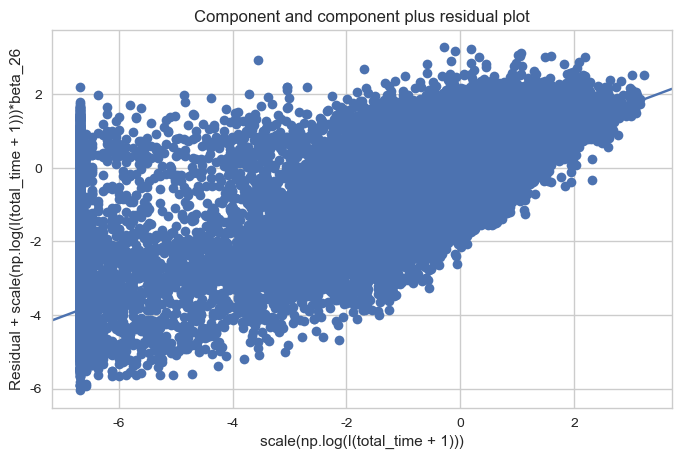

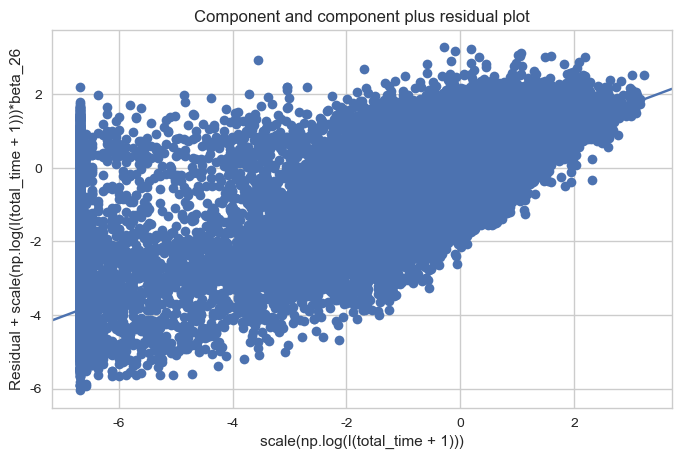

In [47]:

sm.graphics.plot_ccpr(res_all, 'scale(np.log(I(total_time + 1)))')


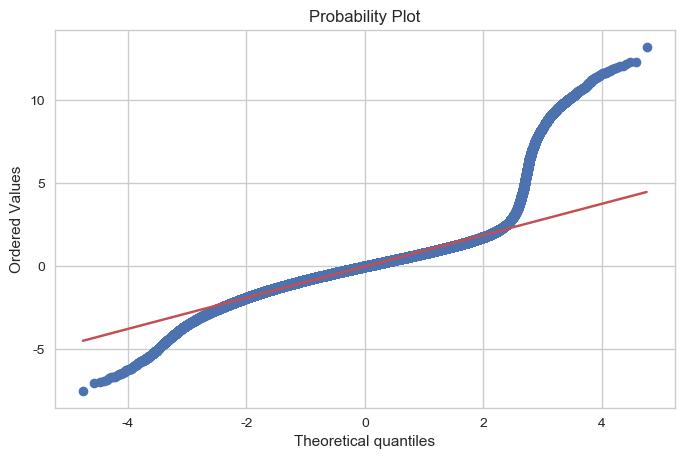

In [43]:
sp.stats.probplot(res_all.resid_pearson, plot=plt)

plt.show()

In [266]:
sm.stats.anova_lm(res_all, typ=2)

,sum_sq,df,F,PR(>F)
C(is_hol),1.130548e+08,1.0,931.374536,2.023688e-204
C(dow),2.119079e+09,6.0,2909.585514,0.000000e+00
C(p_LGA),1.488381e+07,1.0,122.616592,1.701009e-28
C(d_JFK),9.648801e+06,1.0,79.489274,4.859724e-19
C(d_LGA),1.967555e+08,1.0,1620.921644,0.000000e+00
C(dow):scale(hr),6.673297e+09,7.0,7853.759350,0.000000e+00
C(dow):scale(I(hr ** 3)),7.643418e+09,7.0,8995.489008,0.000000e+00
scale(clust_spd),1.870523e+09,1.0,15409.847934,0.000000e+00
scale(total_time),8.802825e+10,1.0,725199.118566,0.000000e+00
scale(day_snowdepth),5.035385e+08,1.0,4148.278042,0.000000e+00


In [77]:
t0 = datetime.now()


fmla = 'dur ~ C(is_hol) + C(dow):scale(hr) + scale(clust_spd)\
+ scale(total_dist) - 1'

model_simple2 = sm.OLS.from_formula(fmla, data=df_copy)
res_simple2 = model_simple2.fit()

t1 = datetime.now()

print(t1-t0)

res_simple2.summary()

0:00:17.337999


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dur   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                 1.132e+05
Date:                Mon, 23 Oct 2017   Prob (F-statistic):               0.00
Time:                        11:11:49   Log-Likelihood:            -5.1734e+06
No. Observations:              700789   AIC:                         1.035e+07
Df Residuals:                  700778   BIC:                         1.035e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
C(is_hol)[False]              816.4343      0.472   1729.230      0.000     815.509     817.360
C(is_hol)[True]               685.2596      3.123    219.436      0.000     679.139     691.380
C(dow)[Friday]:scale(hr)       37.0530      1.141     32.472      0.000      34.817      39.290
C(dow)[Monday]:scale(hr)      -14.0400      1.435     -9.783      0.000     -16.853     -11.227
C(dow)[Saturday]:scale(hr)     56.2161      1.063     52.877      0.000      54.132      58.300
C(dow)[Sunday]:scale(hr)       27.0920      1.153     23.505      0.000      24.833      29.351
C(dow)[Thursday]:scale(hr)     23.0272      1.260     18.269      0.000      20.557      25.498
C(dow)[Tuesday]:scale(hr)      -8.0942      1.375     -5.886      0.000     -10.790      -5.399
C(dow)[Wednesday]:scale(hr)     7.1575      1.319      5.425      0.000       4.572       9.743
scale(clust_spd)             -122.4333      0.790   -155.075      0.000    -123.981    -120.886
scale(total_dist)             587.2444      0.789    743.887      0.000     585.697     588.792
==============================================================================
Omnibus:                   513564.504   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         59738042.370
Skew:                           2.743   Prob(JB):                         0.00
Kurtosis:                      47.897   Cond. No.                         9.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
t0 = datetime.now()


fmla = 'dur ~ C(is_hol) + C(dow):scale(hr) + C(dow):I(scale(hr)**2) + scale(clust_spd)\
+ scale(total_dist) - 1'

model_simple3 = sm.OLS.from_formula(fmla, data=df_copy)
res_simple3 = model_simple3.fit()

t1 = datetime.now()

print(t1-t0)

res_simple3.summary()

0:00:22.901492


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dur   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                 7.116e+04
Date:                Mon, 23 Oct 2017   Prob (F-statistic):               0.00
Time:                        11:13:50   Log-Likelihood:            -5.1588e+06
No. Observations:              700789   AIC:                         1.032e+07
Df Residuals:                  700771   BIC:                         1.032e+07
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
C(is_hol)[False]                      888.2691      0.639   1389.303      0.000     887.016     889.522
C(is_hol)[True]                       775.5914      3.160    245.424      0.000     769.397     781.785
C(dow)[Friday]:scale(hr)               15.8352      1.165     13.591      0.000      13.552      18.119
C(dow)[Monday]:scale(hr)              -42.4374      1.427    -29.734      0.000     -45.235     -39.640
C(dow)[Saturday]:scale(hr)             28.6115      1.172     24.404      0.000      26.314      30.909
C(dow)[Sunday]:scale(hr)              -47.7784      1.441    -33.162      0.000     -50.602     -44.955
C(dow)[Thursday]:scale(hr)              4.8586      1.247      3.895      0.000       2.414       7.304
C(dow)[Tuesday]:scale(hr)             -25.8834      1.355    -19.106      0.000     -28.539     -23.228
C(dow)[Wednesday]:scale(hr)           -12.4077      1.305     -9.509      0.000     -14.965      -9.850
C(dow)[Friday]:I(scale(hr) ** 2)      -51.9112      0.826    -62.854      0.000     -53.530     -50.292
C(dow)[Monday]:I(scale(hr) ** 2)     -113.3670      1.104   -102.691      0.000    -115.531    -111.203
C(dow)[Saturday]:I(scale(hr) ** 2)    -44.4912      0.760    -58.522      0.000     -45.981     -43.001
C(dow)[Sunday]:I(scale(hr) ** 2)      -84.2975      0.890    -94.736      0.000     -86.042     -82.554
C(dow)[Thursday]:I(scale(hr) ** 2)    -71.2121      0.935    -76.154      0.000     -73.045     -69.379
C(dow)[Tuesday]:I(scale(hr) ** 2)     -96.1478      1.052    -91.356      0.000     -98.211     -94.085
C(dow)[Wednesday]:I(scale(hr) ** 2)   -84.7923      0.995    -85.250      0.000     -86.742     -82.843
scale(clust_spd)                     -119.7014      0.773   -154.754      0.000    -121.217    -118.185
scale(total_dist)                     591.3676      0.774    764.443      0.000     589.851     592.884
==============================================================================
Omnibus:                   522355.579   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         68617451.748
Skew:                           2.784   Prob(JB):                         0.00
Kurtosis:                      51.155   Cond. No.                         9.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
t0 = datetime.now()


fmla = 'dur ~ C(is_hol) + C(dow):scale(hr) + C(dow):I(scale(hr)**2)\
+ scale(total_dist) - 1'

model_simple4 = sm.OLS.from_formula(fmla, data=df_copy)
res_simple4 = model_simple4.fit()

t1 = datetime.now()

print(t1-t0)

res_simple4.summary()

0:00:17.535636


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dur   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                 7.166e+04
Date:                Mon, 23 Oct 2017   Prob (F-statistic):               0.00
Time:                        11:14:59   Log-Likelihood:            -5.1706e+06
No. Observations:              700789   AIC:                         1.034e+07
Df Residuals:                  700772   BIC:                         1.034e+07
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
C(is_hol)[False]                      889.4756      0.650   1368.114      0.000     888.201     890.750
C(is_hol)[True]                       776.0806      3.214    241.487      0.000     769.782     782.379
C(dow)[Friday]:scale(hr)               16.8166      1.185     14.193      0.000      14.494      19.139
C(dow)[Monday]:scale(hr)              -41.2992      1.451    -28.454      0.000     -44.144     -38.454
C(dow)[Saturday]:scale(hr)             30.5276      1.192     25.606      0.000      28.191      32.864
C(dow)[Sunday]:scale(hr)              -48.1002      1.465    -32.829      0.000     -50.972     -45.228
C(dow)[Thursday]:scale(hr)              5.5012      1.269      4.337      0.000       3.015       7.988
C(dow)[Tuesday]:scale(hr)             -25.2066      1.378    -18.297      0.000     -27.907     -22.506
C(dow)[Wednesday]:scale(hr)           -11.9444      1.327     -9.002      0.000     -14.545      -9.344
C(dow)[Friday]:I(scale(hr) ** 2)      -52.9163      0.840    -63.006      0.000     -54.562     -51.270
C(dow)[Monday]:I(scale(hr) ** 2)     -116.0009      1.123   -103.338      0.000    -118.201    -113.801
C(dow)[Saturday]:I(scale(hr) ** 2)    -44.2520      0.773    -57.238      0.000     -45.767     -42.737
C(dow)[Sunday]:I(scale(hr) ** 2)      -85.2923      0.905    -94.260      0.000     -87.066     -83.519
C(dow)[Thursday]:I(scale(hr) ** 2)    -72.8651      0.951    -76.629      0.000     -74.729     -71.001
C(dow)[Tuesday]:I(scale(hr) ** 2)     -98.1586      1.070    -91.719      0.000    -100.256     -96.061
C(dow)[Wednesday]:I(scale(hr) ** 2)   -86.3471      1.011    -85.371      0.000     -88.329     -84.365
scale(total_dist)                     494.7377      0.464   1065.288      0.000     493.827     495.648
==============================================================================
Omnibus:                   498165.708   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         53468204.118
Skew:                           2.631   Prob(JB):                         0.00
Kurtosis:                      45.467   Cond. No.                         7.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
df_copy.iloc[609139]

is_hol             False
blizz                  3
m_d                  126
dow              Tuesday
hr                    21
wkhr                  45
p_clust               13
d_clust               17
clust_spd        137.596
L2                0.2157
pas_cnt                4
p_JFK              False
p_LGA              False
d_JFK              False
d_LGA              False
p_lng           -74.1414
p_lat             40.676
d_lng           -73.9546
d_lat            40.7838
dur1                 899
total_dist       34360.7
avg_spd          137.596
total_time        2062.2
day_max_temp          48
day_min_temp          38
day_rainfall           0
day_snowfall           0
day_snowdepth         17
hr_temp              8.3
hr_humid            0.52
hr_dewpt            -1.1
hr_windspeed           0
hr_gustspeed           0
hr_precip              0
dur                  899
Name: 566065, dtype: object

In [96]:
df_copy.loc[df_copy['avg_spd'] > 200, 'avg_spd'].shape

(285,)

In [103]:
df_copy.loc[df_copy['avg_spd'] > 150, 'avg_spd'].index

Int64Index([  2816,   9591,  12050,  12470,  15382,  16274,  19191,  21830,
             22563,  23829,
            ...
            681607, 683931, 685757, 692343, 692737, 693454, 693591, 694971,
            700300, 700556],
           dtype='int64', length=370)

In [102]:
df_bkup = df_copy.copy()

In [104]:
df_copy.drop(df_copy.loc[df_copy['avg_spd'] > 150, 'avg_spd'].index, inplace=True)

In [105]:
df_copy.shape

(700419, 35)

In [121]:
del df_copy['clust_spd']

In [122]:
df_copy.head()

,is_hol,blizz,m_d,dow,hr,wkhr,p_clust,d_clust,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,dur1,total_dist,avg_spd,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,False,0,430,Saturday,23,143,14,16,0.069424,1,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,1454,10010.9,24.786272,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,False,0,430,Saturday,23,143,17,17,0.057791,1,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,1409,10357.0,26.462172,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,False,0,430,Saturday,23,143,1,17,0.066698,2,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,1081,9275.8,30.890731,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,False,0,430,Saturday,23,143,28,19,0.018223,1,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,800,2726.9,12.271050,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,False,0,430,Saturday,23,143,1,26,0.027198,1,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,1151,3455.8,10.808758,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [117]:
gby_train_pd_clust = df_copy.groupby(['p_clust', 'd_clust'])

In [123]:
gby_train_pd_clust.size()

p_clust  d_clust
0        0            609
         1            279
         2           3666
         3             95
         4            236
         5           5373
         6            665
         7           2931
         8             44
         9            499
         10            24
         11          1716
         12           158
         13           170
         14           532
         16            36
         17         10950
         18           404
         19          1772
         20          2576
         21          8356
         22            17
         23             1
         24            11
         26           780
         27            95
         28             1
         29            64
1        0           5430
         1            209
                    ...  
28       29           267
29       0           2792
         1            170
         2            375
         3            452
         4            300
         5           

In [124]:
df_copy.loc[gby_train_pd_clust.groups[(0, 0)], :].head()

,is_hol,blizz,m_d,dow,hr,wkhr,p_clust,d_clust,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,dur1,total_dist,avg_spd,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
2198,False,0,430,Saturday,17,137,0,0,0.064899,1,False,False,False,False,-73.953278,40.779480,-74.005562,40.741032,1987,9317.2,16.880684,736.4,65,46,0.0,0.0,0.0,17.8,0.28,-1.1,5.6,0.0,0.0,1987
3109,False,0,430,Saturday,15,135,0,0,0.062376,2,False,False,False,False,-73.956284,40.778454,-74.001625,40.735619,2134,9055.0,15.275539,706.0,65,46,0.0,0.0,0.0,16.7,0.41,3.3,0.0,0.0,0.0,2134
3339,False,0,430,Saturday,14,134,0,0,0.057157,1,False,False,False,False,-73.957123,40.777721,-74.003197,40.743896,1346,6772.8,18.114473,638.1,65,46,0.0,0.0,0.0,16.7,0.38,2.2,13.0,0.0,0.0,1346
3348,False,0,430,Saturday,14,134,0,0,0.068963,1,False,False,False,False,-73.947067,40.780235,-74.004517,40.742084,1338,8945.3,24.068072,627.9,65,46,0.0,0.0,0.0,16.7,0.38,2.2,13.0,0.0,0.0,1338
4424,False,0,430,Saturday,10,130,0,0,0.067577,1,False,False,False,False,-73.952599,40.783691,-74.008209,40.745296,1253,10408.3,29.904134,761.0,65,46,0.0,0.0,0.0,10.6,0.59,2.8,5.6,0.0,0.0,1253


In [125]:
clust_spd = pd.Series(np.zeros(df_copy.shape[0]), index=df_copy.index, name='clust_spd')
for idx in gby_train_pd_clust.indices.keys():
    clust_spd[gby_train_pd_clust.groups[idx]]\
    = df_copy.loc[gby_train_pd_clust.groups[idx], 'avg_spd'].mean()

df_copy.insert(8, 'clust_spd', clust_spd)

df_copy.loc[gby_train_pd_clust.groups[(0, 3)], :].head(20)

,is_hol,blizz,m_d,dow,hr,wkhr,p_clust,d_clust,clust_spd,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,dur1,total_dist,avg_spd,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
1029,False,0,430,Saturday,21,141,0,3,27.38209,0.044827,1,False,False,False,False,-73.954033,40.774769,-73.956657,40.730019,1073,7887.7,26.463858,534.9,65,46,0.00,0.0,0.0,11.7,0.47,0.6,11.1,0.0,0.0,1073
7978,False,0,429,Friday,19,115,0,3,27.38209,0.044741,1,False,False,False,False,-73.956299,40.778481,-73.954002,40.733799,1258,7656.3,21.909921,600.9,58,45,0.05,0.0,0.0,11.1,0.53,1.7,11.1,0.0,0.0,1258
14120,False,0,428,Thursday,19,91,0,3,27.38209,0.049722,1,False,False,False,False,-73.955368,40.779488,-73.951271,40.729935,1107,8262.0,26.868293,575.9,59,48,0.00,0.0,0.0,11.7,0.41,-1.1,7.4,0.0,0.0,1107
25072,False,0,426,Tuesday,21,45,0,3,27.38209,0.069957,1,False,False,False,False,-73.959373,40.782921,-73.949257,40.713699,1683,10862.4,23.235080,848.4,60,47,0.24,0.0,0.0,9.4,0.83,6.7,13.0,0.0,0.0,1683
28642,False,0,426,Tuesday,10,34,0,3,27.38209,0.046621,1,False,False,False,False,-73.945435,40.775356,-73.945038,40.728737,1356,9776.9,25.956372,659.5,60,47,0.24,0.0,0.0,11.7,0.86,9.4,7.4,0.0,0.0,1356
30363,False,0,425,Monday,22,22,0,3,27.38209,0.078176,1,False,False,False,False,-73.947495,40.783379,-73.965523,40.707310,853,13263.0,55.975147,875.5,69,50,0.00,0.0,0.0,15.0,0.60,7.2,0.0,0.0,0.0,853
30509,False,0,425,Monday,21,21,0,3,27.38209,0.063690,1,False,False,False,False,-73.952530,40.778297,-73.939110,40.716038,1336,10242.3,27.599012,747.9,69,50,0.00,0.0,0.0,16.1,0.56,7.2,7.4,0.0,0.0,1336
38070,False,0,424,Sunday,12,156,0,3,27.38209,0.059284,1,False,False,False,False,-73.948151,40.783169,-73.952942,40.724079,1415,9747.9,24.800311,739.9,68,47,0.00,0.0,0.0,12.8,0.23,-7.8,13.0,0.0,0.0,1415
44589,False,0,423,Saturday,10,130,0,3,27.38209,0.049018,1,False,False,False,False,-73.945824,40.781631,-73.942902,40.732700,1403,8724.4,22.386201,526.5,71,54,0.16,0.0,0.0,16.1,0.87,13.9,7.4,0.0,0.3,1403
54357,False,0,421,Thursday,17,89,0,3,27.38209,0.067821,2,False,False,False,False,-73.950813,40.779251,-73.942230,40.711975,2295,11263.0,17.667451,801.5,73,49,0.00,0.0,0.0,21.7,0.28,2.2,0.0,0.0,0.0,2295


In [126]:
t0 = datetime.now()


fmla = 'np.log(dur+1) ~ C(is_hol) + C(dow):scale(hr) + C(dow):I(scale(hr)**2) + scale(np.log(clust_spd+1))\
+ scale(np.log(total_dist+1)) - 1'

model_simple4 = sm.OLS.from_formula(fmla, data=df_copy)
res_simple4 = model_simple4.fit()

t1 = datetime.now()

print(t1-t0)

res_simple4.summary()

0:00:22.763541


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(dur + 1)   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                 5.825e+04
Date:                Mon, 23 Oct 2017   Prob (F-statistic):               0.00
Time:                        11:34:27   Log-Likelihood:            -4.9336e+05
No. Observations:              700419   AIC:                         9.868e+05
Df Residuals:                  700401   BIC:                         9.870e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
C(is_hol)[False]                        6.5296      0.001   7939.268      0.000       6.528       6.531
C(is_hol)[True]                         6.3905      0.004   1573.098      0.000       6.383       6.398
C(dow)[Friday]:scale(hr)                0.0247      0.001     16.481      0.000       0.022       0.028
C(dow)[Monday]:scale(hr)               -0.0399      0.002    -21.736      0.000      -0.043      -0.036
C(dow)[Saturday]:scale(hr)              0.0440      0.002     29.195      0.000       0.041       0.047
C(dow)[Sunday]:scale(hr)               -0.0487      0.002    -26.302      0.000      -0.052      -0.045
C(dow)[Thursday]:scale(hr)              0.0109      0.002      6.815      0.000       0.008       0.014
C(dow)[Tuesday]:scale(hr)              -0.0241      0.002    -13.856      0.000      -0.028      -0.021
C(dow)[Wednesday]:scale(hr)            -0.0074      0.002     -4.402      0.000      -0.011      -0.004
C(dow)[Friday]:I(scale(hr) ** 2)       -0.0609      0.001    -57.382      0.000      -0.063      -0.059
C(dow)[Monday]:I(scale(hr) ** 2)       -0.1357      0.001    -95.596      0.000      -0.138      -0.133
C(dow)[Saturday]:I(scale(hr) ** 2)     -0.0496      0.001    -50.795      0.000      -0.052      -0.048
C(dow)[Sunday]:I(scale(hr) ** 2)       -0.0999      0.001    -87.309      0.000      -0.102      -0.098
C(dow)[Thursday]:I(scale(hr) ** 2)     -0.0856      0.001    -71.161      0.000      -0.088      -0.083
C(dow)[Tuesday]:I(scale(hr) ** 2)      -0.1149      0.001    -84.880      0.000      -0.118      -0.112
C(dow)[Wednesday]:I(scale(hr) ** 2)    -0.1025      0.001    -80.112      0.000      -0.105      -0.100
scale(np.log(clust_spd + 1))            0.0171      0.001     22.079      0.000       0.016       0.019
scale(np.log(total_dist + 1))           0.5706      0.001    735.914      0.000       0.569       0.572
==============================================================================
Omnibus:                   348447.085   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9981626.286
Skew:                           1.824   Prob(JB):                         0.00
Kurtosis:                      21.131   Cond. No.                         8.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
t0 = datetime.now()


fmla = 'dur ~ C(is_hol) + C(dow):scale(hr) + C(dow):I(scale(hr)**2) + scale(clust_spd)\
+ scale(total_dist) - 1'

model_simple4 = sm.OLS.from_formula(fmla, data=df_copy)
res_simple4 = model_simple4.fit()

t1 = datetime.now()

print(t1-t0)

res_simple4.summary()

0:00:22.906922


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dur   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                 7.197e+04
Date:                Mon, 23 Oct 2017   Prob (F-statistic):               0.00
Time:                        11:36:47   Log-Likelihood:            -5.1533e+06
No. Observations:              700419   AIC:                         1.031e+07
Df Residuals:                  700401   BIC:                         1.031e+07
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
C(is_hol)[False]                      888.5464      0.637   1394.829      0.000     887.298     889.795
C(is_hol)[True]                       774.9810      3.149    246.102      0.000     768.809     781.153
C(dow)[Friday]:scale(hr)               15.8998      1.161     13.697      0.000      13.625      18.175
C(dow)[Monday]:scale(hr)              -41.9373      1.422    -29.487      0.000     -44.725     -39.150
C(dow)[Saturday]:scale(hr)             28.3242      1.168     24.248      0.000      26.035      30.614
C(dow)[Sunday]:scale(hr)              -48.1422      1.436    -33.535      0.000     -50.956     -45.329
C(dow)[Thursday]:scale(hr)              5.3855      1.243      4.333      0.000       2.949       7.822
C(dow)[Tuesday]:scale(hr)             -25.4796      1.350    -18.877      0.000     -28.125     -22.834
C(dow)[Wednesday]:scale(hr)           -12.0342      1.300     -9.257      0.000     -14.582      -9.486
C(dow)[Friday]:I(scale(hr) ** 2)      -51.7555      0.823    -62.900      0.000     -53.368     -50.143
C(dow)[Monday]:I(scale(hr) ** 2)     -113.3345      1.100   -103.026      0.000    -115.491    -111.178
C(dow)[Saturday]:I(scale(hr) ** 2)    -44.6260      0.757    -58.924      0.000     -46.110     -43.142
C(dow)[Sunday]:I(scale(hr) ** 2)      -84.2144      0.887    -94.995      0.000     -85.952     -82.477
C(dow)[Thursday]:I(scale(hr) ** 2)    -70.8955      0.932    -76.085      0.000     -72.722     -69.069
C(dow)[Tuesday]:I(scale(hr) ** 2)     -96.1047      1.049    -91.652      0.000     -98.160     -94.050
C(dow)[Wednesday]:I(scale(hr) ** 2)   -84.3780      0.991    -85.133      0.000     -86.321     -82.435
scale(clust_spd)                     -152.0374      0.908   -167.356      0.000    -153.818    -150.257
scale(total_dist)                     626.5433      0.908    689.758      0.000     624.763     628.324
==============================================================================
Omnibus:                   513462.517   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         64154711.920
Skew:                           2.722   Prob(JB):                         0.00
Kurtosis:                      49.569   Cond. No.                         9.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
res_simple4.rsquared_adj

0.62064271239817548

In [246]:
def dow_poly(deg=1, var_='hr', scale_=True):
    if deg == 0:
        return 'C(dow)'
    poly_sum = 'C(dow):scale({})'.format(var_) if scale_ else var_
    for pwr in range(2, deg+1):
        nth_deg = ' + C(dow):scale(I({}**{}))'.format(var_, pwr) if scale_\
                  else ' + I({}**{})'.format(var_, pwr)
        poly_sum += nth_deg
    return poly_sum

In [241]:
def poly_string(deg=1, var_='x', plus=True, scale_=True, last_var=False):
    if deg == 0:
        return ' + ' if plus and not last_var else ''
    poly_sum = ' + ' if plus else ''
    poly_sum += 'scale({})'.format(var_) if scale_ else var_
    for pwr in range(2, deg+1):
        nth_deg = ' + scale(I({}**{}))'.format(var_, pwr) if scale_\
                  else ' + I({}**{})'.format(var_, pwr)
        poly_sum += nth_deg
    return poly_sum

In [138]:
dow_poly(4)

'C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(dow):scale(I(hr**4))'

In [143]:
poly_string(3, 'p_lng')

'scale(p_lng) + scale(I(p_lng**2)) + scale(I(p_lng**3))'

In [255]:
def make_fmla(dur_log=False, hr_deg=1, clust_spd_log=False, total_dist_log=False,\
              p_lng_deg=0, p_lat_deg=0, d_lng_deg=0, d_lat_deg=0, const_=False):
    fmla = 'np.log(dur+1) ~ C(is_hol)' if dur_log else 'dur ~ C(is_hol)'
    fmla += ' + ' + dow_poly(hr_deg, 'hr')
    fmla += ' + scale(np.log(clust_spd)+1)' if clust_spd_log else ' + scale(clust_spd)'
    fmla += ' + scale(np.log(total_dist)+1)' if total_dist_log else ' + scale(total_dist)'
    fmla += poly_string(p_lng_deg, 'p_lng') + poly_string(p_lat_deg, 'p_lat')\
          + poly_string(d_lng_deg, 'd_lng') + poly_string(d_lat_deg, 'd_lat')
    while fmla[-3:] == ' + ':
        fmla = fmla[:-3]
    fmla += '' if const_ else ' - 1'
    return fmla

In [249]:
make_fmla(True, 0, True, False, 0, 0, 0, 0, False)

'np.log(dur) ~ C(is_hol) + C(dow) + scale(np.log(clust_spd)) + scale(total_dist) - 1'

In [279]:
tf = [True, False]
t_only = [True]
f_only = [False]
hr_range = list(range(6))
deg_range = list(range(1, 2))

dur_list = tf
hr_list = hr_range
clust_spd_list = f_only
total_dist_list = f_only
p_lng_list = deg_range
p_lat_list = deg_range
d_lng_list = deg_range
d_lat_list = deg_range
const_list = tf

In [292]:
tf = [True, False]
t_only = [True]
f_only = [False]
hr_range = list(range(6, 11))
deg_range = list(range(1, 2))

dur_list = f_only
hr_list = hr_range
clust_spd_list = f_only
total_dist_list = f_only
p_lng_list = deg_range
p_lat_list = deg_range
d_lng_list = deg_range
d_lat_list = deg_range
const_list = t_only

In [293]:
len(list(itertools.product(dur_list, hr_list, clust_spd_list, total_dist_list,\
                           p_lng_list, p_lat_list, d_lng_list, d_lat_list, const_list)))

5

In [285]:
import itertools
from datetime import datetime

t00 = datetime.now()


i = 0
res_dict = OrderedDict([(col, '') for col in df_results.columns])

optses = list(itertools.product(dur_list, hr_list, clust_spd_list, total_dist_list,\
                                p_lng_list, p_lat_list, d_lng_list, d_lat_list, const_list))
for num, opts in enumerate(optses):
    t0 = datetime.now()

    i = num
    print(i)
    print(opts)
    for idx, opt in enumerate(opts):
        res_dict[list(res_dict.items())[idx][0]] = opt

    mod = sm.OLS.from_formula(make_fmla(*opts), data=df_copy)
    res = mod.fit()
    for stat_ in df_results.columns[-5:]:
        res_dict[stat_] = eval('res.{}'.format(stat_))

    df_results.append(pd.Series(res_dict), ignore_index=True)
    
    df_results_bkup = df_results.copy()
    
    t1 = datetime.now()
    print(t1-t0)

    
    
t2 = datetime.now()
print(t2-t00)

0
(True, 0, False, False, 1, 1, 1, 1, True)
0:00:29.730036
1
(True, 0, False, False, 1, 1, 1, 1, False)
0:00:30.236918
2
(True, 1, False, False, 1, 1, 1, 1, True)
0:00:35.212163
3
(True, 1, False, False, 1, 1, 1, 1, False)
0:00:39.390948
4
(True, 2, False, False, 1, 1, 1, 1, True)
0:00:46.639099
5
(True, 2, False, False, 1, 1, 1, 1, False)
0:00:45.400747
6
(True, 3, False, False, 1, 1, 1, 1, True)
0:00:49.142348
7
(True, 3, False, False, 1, 1, 1, 1, False)
0:00:50.384273
8
(True, 4, False, False, 1, 1, 1, 1, True)
0:00:52.727989
9
(True, 4, False, False, 1, 1, 1, 1, False)
0:00:54.893994
10
(True, 5, False, False, 1, 1, 1, 1, True)
0:01:00.400088
11
(True, 5, False, False, 1, 1, 1, 1, False)
0:00:58.461483
12
(False, 0, False, False, 1, 1, 1, 1, True)
0:00:30.313346
13
(False, 0, False, False, 1, 1, 1, 1, False)
0:00:31.102726
14
(False, 1, False, False, 1, 1, 1, 1, True)
0:00:35.506432
15
(False, 1, False, False, 1, 1, 1, 1, False)
0:00:36.255480
16
(False, 2, False, False, 1, 1, 1, 1

In [298]:
import itertools
from datetime import datetime

t00 = datetime.now()

results_dict = dict()

i = 0
res_dict = OrderedDict([(col, '') for col in df_results.columns])

optses = list(itertools.product(dur_list, hr_list, clust_spd_list, total_dist_list,\
                                p_lng_list, p_lat_list, d_lng_list, d_lat_list, const_list))
for num, opts in enumerate(optses):
    t0 = datetime.now()

    i = num
    print(i)
    print(opts)
    for idx, opt in enumerate(opts):
        res_dict[list(res_dict.items())[idx][0]] = opt

    mod = sm.OLS.from_formula(make_fmla(*opts), data=df_copy)
    res = mod.fit()
    for stat_ in df_results.columns[-5:]:
        res_dict[stat_] = eval('res.{}'.format(stat_))

    df_results.append(pd.Series(res_dict), ignore_index=True)
    df_results_bkup = df_results.copy()
    
    results_dict[tuple(opts)] = res
    
    t1 = datetime.now()
    print(t1-t0)

    
    
t2 = datetime.now()
print(t2-t00)

0
(False, 6, False, False, 1, 1, 1, 1, True)
0:01:06.040238
1
(False, 7, False, False, 1, 1, 1, 1, True)
0:01:10.649899
2
(False, 8, False, False, 1, 1, 1, 1, True)
0:01:19.650838
3
(False, 9, False, False, 1, 1, 1, 1, True)
0:01:28.686951
4
(False, 10, False, False, 1, 1, 1, 1, True)
0:01:34.834219
0:06:39.864151


In [300]:
df_results

,dur_log,hr_deg,clust_spd_log,total_dist_log,p_lng_deg,p_lat_deg,d_lng_deg,d_lat_deg,const,rsquared,rsquared_adj,aic,bic,condition_number
0,True,0,False,False,1,1,1,1,True,0.468573,0.468563,1.161179e+06,1.161339e+06,11.873358
1,True,0,False,False,1,1,1,1,False,0.468573,0.468563,1.161179e+06,1.161339e+06,12.914335
2,True,1,False,False,1,1,1,1,True,0.466031,0.466020,1.164523e+06,1.164695e+06,10.980142
3,True,1,False,False,1,1,1,1,False,0.466031,0.466020,1.164523e+06,1.164695e+06,10.853013
4,True,2,False,False,1,1,1,1,True,0.482137,0.482122,1.143085e+06,1.143337e+06,28.053769
5,True,2,False,False,1,1,1,1,False,0.482137,0.482122,1.143085e+06,1.143337e+06,28.055513
6,True,3,False,False,1,1,1,1,True,0.485087,0.485067,1.139098e+06,1.139430e+06,136.257870
7,True,3,False,False,1,1,1,1,False,0.485087,0.485067,1.139098e+06,1.139430e+06,136.257865
8,True,4,False,False,1,1,1,1,True,0.489027,0.489001,1.133732e+06,1.134145e+06,791.264218
9,True,4,False,False,1,1,1,1,False,0.489027,0.489001,1.133732e+06,1.134145e+06,791.264670


In [358]:
df_results.to_csv('../_data/OLS_result_variables_171023.csv', index=False)

In [308]:
make_fmla(False, 1, False, False, 1, 1, 1, 1, True)

'dur ~ C(is_hol) + C(dow):scale(hr) + scale(clust_spd) + scale(total_dist) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(d_lat)'

In [41]:
model_cats = sm.OLS.from_formula('dur ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**3)) + scale(clust_spd) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA)\
                                + scale(total_dist) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(d_lat)',
                                 data=df_copy.sample(100000))

res_cats = model_cats.fit()

```
'dur ~ C(is_hol) + C(dow):C(hr) + scale(clust_spd) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA)\
                                + scale(total_dist) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(d_lat)'
```
                                0.675  
                                cond 120
                                aic 1.023e7

```
'dur ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + scale(clust_spd) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA)\
                                + scale(total_dist) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(d_lat)'
```
0.663  
cond 28.7  
aic 1.025e7

```
'dur ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + scale(clust_spd) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA)\
                                + scale(total_dist) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(d_lat)'
```
0.667  
cond 136  
aic 1.024e7

```
'dur ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**3)) + scale(clust_spd) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA)\
                                + scale(total_dist) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(d_lat)'
                                ```
                                0.664  
                                cond 27.1  
                                aic 1.025e7

In [42]:
res_cats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dur   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     6548.
Date:                Mon, 23 Oct 2017   Prob (F-statistic):               0.00
Time:                        15:49:26   Log-Likelihood:            -7.2988e+05
No. Observations:              100000   AIC:                         1.460e+06
Df Residuals:                   99968   BIC:                         1.460e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             852.0061      2.893    294.545      0.000     846.337     857.676
C(is_hol)[T.True]                    -119.6942      7.947    -15.061      0.000    -135.270    -104.118
C(dow)[T.Monday]                      -74.6783      4.337    -17.218      0.000     -83.179     -66.177
C(dow)[T.Saturday]                    -71.5486      4.059    -17.627      0.000     -79.504     -63.593
C(dow)[T.Sunday]                     -137.5971      4.275    -32.184      0.000    -145.977    -129.217
C(dow)[T.Thursday]                      8.3823      4.105      2.042      0.041       0.336      16.429
C(dow)[T.Tuesday]                     -27.1951      4.231     -6.428      0.000     -35.488     -18.903
C(dow)[T.Wednesday]                    -7.9279      4.177     -1.898      0.058     -16.114       0.258
C(p_JFK)[T.True]                     -135.9748     15.335     -8.867      0.000    -166.032    -105.917
C(p_LGA)[T.True]                      145.4633      9.516     15.286      0.000     126.812     164.115
C(d_JFK)[T.True]                     -647.7504     19.015    -34.065      0.000    -685.020    -610.481
C(d_LGA)[T.True]                      -93.8754     12.487     -7.518      0.000    -118.349     -69.402
C(dow)[Friday]:scale(hr)              216.7901      6.932     31.273      0.000     203.203     230.377
C(dow)[Monday]:scale(hr)              284.0292      9.356     30.359      0.000     265.692     302.366
C(dow)[Saturday]:scale(hr)             75.3040      6.126     12.292      0.000      63.296      87.312
C(dow)[Sunday]:scale(hr)               66.1999      6.484     10.209      0.000      53.491      78.909
C(dow)[Thursday]:scale(hr)            330.0061      8.110     40.692      0.000     314.111     345.901
C(dow)[Tuesday]:scale(hr)             338.2781      9.189     36.814      0.000     320.268     356.288
C(dow)[Wednesday]:scale(hr)           335.0652      8.749     38.296      0.000     317.917     352.214
C(dow)[Friday]:scale(I(hr ** 3))     -189.5674      6.882    -27.544      0.000    -203.057    -176.078
C(dow)[Monday]:scale(I(hr ** 3))     -310.8864      8.857    -35.100      0.000    -328.246    -293.526
C(dow)[Saturday]:scale(I(hr ** 3))    -19.6764      6.519     -3.018      0.003     -32.454      -6.899
C(dow)[Sunday]:scale(I(hr ** 3))      -72.3012      7.520     -9.614      0.000     -87.041     -57.561
C(dow)[Thursday]:scale(I(hr ** 3))   -318.1007      7.612    -41.787      0.000    -333.021    -303.181
C(dow)[Tuesday]:scale(I(hr ** 3))    -351.7945      8.533    -41.229      0.000    -368.519    -335.070
C(dow)[Wednesday]:scale(I(hr ** 3))  -340.1744      8.159    -41.691      0.000    -356.167    -324.182
scale(clust_spd)                     -170.4324      2.325    -73.29

In [315]:
res_list = list()

In [316]:
df_copy.head()

,is_hol,blizz,m_d,dow,hr,wkhr,p_clust,d_clust,clust_spd,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,dur1,total_dist,avg_spd,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,False,0,430,Saturday,23,143,14,16,25.468628,0.069424,1,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,1454,10010.9,24.786272,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,False,0,430,Saturday,23,143,17,17,29.682066,0.057791,1,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,1409,10357.0,26.462172,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,False,0,430,Saturday,23,143,1,17,22.500694,0.066698,2,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,1081,9275.8,30.890731,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,False,0,430,Saturday,23,143,28,19,15.365966,0.018223,1,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,800,2726.9,12.271050,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,False,0,430,Saturday,23,143,1,26,13.594907,0.027198,1,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,1151,3455.8,10.808758,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [340]:
fmla_str = 'dur ~ C(is_hol) + scale(blizz) + C(dow):C(hr) + scale(np.log(clust_spd+1)) + C(p_JFK) + C(p_LGA) + C(d_JFK) + C(d_LGA)\
                + scale(total_dist)'

model_cats = sm.OLS.from_formula(fmla_str, data=df_copy)

res_cats = model_cats.fit()

res_list.append((fmla_str, res_cats))


In [326]:
len(res_list)

3

In [341]:
res_list[6][1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dur   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     7645.
Date:                Mon, 23 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:55:26   Log-Likelihood:            -5.1330e+06
No. Observations:              700419   AIC:                         1.027e+07
Df Residuals:                  700243   BIC:                         1.027e+07
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       708.7355      5.681    124.757      0.000     697.601     719.870
C(is_hol)[T.True]              -112.2333      3.135    -35.802      0.000    -118.377    -106.089
C(p_JFK)[T.True]               -427.9265      4.090   -104.623      0.000    -435.943    -419.910
C(p_LGA)[T.True]                -33.7624      3.120    -10.820      0.000     -39.878     -27.647
C(d_JFK)[T.True]               -315.0017      6.342    -49.670      0.000    -327.432    -302.572
C(d_LGA)[T.True]                -66.0264      4.551    -14.507      0.000     -74.947     -57.106
C(hr)[T.1]                      -18.6720      8.959     -2.084      0.037     -36.230      -1.114
C(hr)[T.2]                      -48.9055     10.019     -4.881      0.000     -68.542     -29.269
C(hr)[T.3]                      -60.7344     11.079     -5.482      0.000     -82.449     -39.020
C(hr)[T.4]                     -112.1795     12.324     -9.103      0.000    -136.333     -88.026
C(hr)[T.5]                     -212.6409     12.083    -17.598      0.000    -236.323    -188.959
C(hr)[T.6]                      -97.5891      9.063    -10.768      0.000    -115.353     -79.825
C(hr)[T.7]                       74.9795      7.753      9.671      0.000      59.784      90.175
C(hr)[T.8]                      205.0344      7.535     27.213      0.000     190.267     219.802
C(hr)[T.9]                      236.7402      7.631     31.024      0.000     221.784     251.696
C(hr)[T.10]                     238.2366      7.840     30.388      0.000     222.871     253.602
C(hr)[T.11]                     242.0187      7.793     31.058      0.000     226.745     257.292
C(hr)[T.12]                     226.5858      7.679     29.509      0.000     211.536     241.636
C(hr)[T.13]                     190.7525      7.675     24.855      0.000     175.710     205.795
C(hr)[T.14]                     246.0031      7.534     32.652      0.000     231.236     260.770
C(hr)[T.15]                     304.0704      7.646     39.768      0.000     289.084     319.056
C(hr)[T.16]                     282.8056      7.889     35.850      0.000     267.344     298.267
C(hr)[T.17]                     252.0434      7.511     33.557      0.000     237.322     266.765
C(hr)[T.18]                     209.9756      7.197     29.175      0.000     195.869     224.082
C(hr)[T.19]                     161.3086      7.143     22.584      0.000     147.309     175.308
C(hr)[T.20]                     118.8212      7.272     16.340      0.000     104.569     133.074
C(hr)[T.21]                      99.7100      7.309     13.643      0.000      85.385     114.035
C(hr)[T.22]                     122.8605      7.256     16.932      0.000     108.639     137.082
C(hr)[T.23]                     118.0918     

In [312]:
model_cats = sm.OLS.from_formula('dur ~ C(is_hol) + C(dow):C(hr) + scale(clust_spd)\
                                + scale(total_dist) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(d_lat)',
                                 data=df_copy)

res_cats = model_cats.fit()

In [339]:
list(map(lambda x: x.rsquared, results_dict.values()))

[0.6531777012167852,
 0.65396699131314528,
 0.65553072353478903,
 0.65583925152847278,
 0.65616979822817434]

In [306]:
results_dict[(False,
  ,
  False,
  False,
  1,
  1,
  1,
  1,
  True)].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dur   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                 2.116e+04
Date:                Mon, 23 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:30:24   Log-Likelihood:            -5.1340e+06
No. Observations:              700419   AIC:                         1.027e+07
Df Residuals:                  700355   BIC:                         1.027e+07
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             806.7674      0.460   1755.351      0.000     805.867     807.668
C(is_hol)[T.True]                    -118.1520      3.016    -39.181      0.000    -124.062    -112.242
C(dow)[Friday]:scale(hr)             1736.9712    100.451     17.292      0.000    1540.090    1933.852
C(dow)[Monday]:scale(hr)             2641.4938    143.132     18.455      0.000    2360.959    2922.028
C(dow)[Saturday]:scale(hr)           -279.8264     83.562     -3.349      0.001    -443.605    -116.047
C(dow)[Sunday]:scale(hr)              172.6332     84.635      2.040      0.041       6.752     338.514
C(dow)[Thursday]:scale(hr)           1643.5830    123.489     13.310      0.000    1401.549    1885.617
C(dow)[Tuesday]:scale(hr)            2067.9634    142.211     14.541      0.000    1789.234    2346.693
C(dow)[Wednesday]:scale(hr)          1637.8585    131.660     12.440      0.000    1379.810    1895.907
C(dow)[Friday]:scale(I(hr ** 2))    -4.863e+04   1929.990    -25.195      0.000   -5.24e+04   -4.48e+04
C(dow)[Monday]:scale(I(hr ** 2))    -6.544e+04   2598.578    -25.183      0.000   -7.05e+04   -6.03e+04
C(dow)[Saturday]:scale(I(hr ** 2))    389.0451   1660.936      0.234      0.815   -2866.335    3644.425
C(dow)[Sunday]:scale(I(hr ** 2))    -1.297e+04   1694.027     -7.657      0.000   -1.63e+04   -9650.364
C(dow)[Thursday]:scale(I(hr ** 2))  -5.488e+04   2294.858    -23.914      0.000   -5.94e+04   -5.04e+04
C(dow)[Tuesday]:scale(I(hr ** 2))   -6.017e+04   2566.583    -23.442      0.000   -6.52e+04   -5.51e+04
C(dow)[Wednesday]:scale(I(hr ** 2)) -5.098e+04   2419.688    -21.070      0.000   -5.57e+04   -4.62e+04
C(dow)[Friday]:scale(I(hr ** 3))     3.779e+05   1.37e+04     27.544      0.000    3.51e+05    4.05e+05
C(dow)[Monday]:scale(I(hr ** 3))     4.971e+05   1.79e+04     27.769      0.000    4.62e+05    5.32e+05
C(dow)[Saturday]:scale(I(hr ** 3))  -1.356e+04   1.21e+04     -1.119      0.263   -3.73e+04    1.02e+04
C(dow)[Sunday]:scale(I(hr ** 3))     1.096e+05   1.25e+04      8.737      0.000     8.5e+04    1.34e+05
C(dow)[Thursday]:scale(I(hr ** 3))   4.543e+05    1.6e+04     28.392      0.000    4.23e+05    4.86e+05
C(dow)[Tuesday]:scale(I(hr ** 3))    4.805e+05   1.76e+04     27.248      0.000    4.46e+05    5.15e+05
C(dow)[Wednesday]:scale(I(hr ** 3))  4.129e+05   1.68e+04     24.623      0.000     3.8e+05    4.46e+05
C(dow)[Friday]:scale(I(hr ** 4))    -1.334e+06   4.84e+04    -27.584      0.000   -1.43e+06   -1.24e+06
C(dow)[Monday]:scale(I(hr ** 4))    -1.743e+06   6.19e+04    -28.148      0.000   -1.86e+06   -1.62e+06
C(dow)[Saturday]:scale(I(hr ** 4))   1.063e+05   4.37e+04      2.435      0.015    2.07e+04    1.92e+05
C(dow)[Sunday]:scale(I(hr ** 4))    -4.059e+05   4.59e+04     -8.85

In [288]:
df_res_copy = df_results.copy()

In [291]:
df_res_copy.append(pd.Series(res_dict), ignore_index=True)

,dur_log,hr_deg,clust_spd_log,total_dist_log,p_lng_deg,p_lat_deg,d_lng_deg,d_lat_deg,const,rsquared,rsquared_adj,aic,bic,condition_number
0,True,0,False,False,1,1,1,1,True,0.468573,0.468563,1.161179e+06,1.161339e+06,11.873358
1,True,0,False,False,1,1,1,1,False,0.468573,0.468563,1.161179e+06,1.161339e+06,12.914335
2,True,1,False,False,1,1,1,1,True,0.466031,0.466020,1.164523e+06,1.164695e+06,10.980142
3,True,1,False,False,1,1,1,1,False,0.466031,0.466020,1.164523e+06,1.164695e+06,10.853013
4,True,2,False,False,1,1,1,1,True,0.482137,0.482122,1.143085e+06,1.143337e+06,28.053769
5,True,2,False,False,1,1,1,1,False,0.482137,0.482122,1.143085e+06,1.143337e+06,28.055513
6,True,3,False,False,1,1,1,1,True,0.485087,0.485067,1.139098e+06,1.139430e+06,136.257870
7,True,3,False,False,1,1,1,1,False,0.485087,0.485067,1.139098e+06,1.139430e+06,136.257865
8,True,4,False,False,1,1,1,1,True,0.489027,0.489001,1.133732e+06,1.134145e+06,791.264218
9,True,4,False,False,1,1,1,1,False,0.489027,0.489001,1.133732e+06,1.134145e+06,791.264670


In [287]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dur   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                 3.138e+04
Date:                Mon, 23 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:11:44   Log-Likelihood:            -5.1366e+06
No. Observations:              700419   AIC:                         1.027e+07
Df Residuals:                  700376   BIC:                         1.027e+07
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
C(is_hol)[False]                      807.2260      0.458   1761.625      0.000     806.328     808.124
C(is_hol)[True]                       685.6187      2.989    229.369      0.000     679.760     691.477
C(dow)[Friday]:scale(hr)             -680.6953     35.678    -19.079      0.000    -750.623    -610.768
C(dow)[Monday]:scale(hr)             -642.3438     48.265    -13.309      0.000    -736.942    -547.746
C(dow)[Saturday]:scale(hr)           -465.9483     30.006    -15.528      0.000    -524.760    -407.137
C(dow)[Sunday]:scale(hr)             -345.6870     30.624    -11.288      0.000    -405.710    -285.664
C(dow)[Thursday]:scale(hr)          -1129.8240     42.861    -26.360      0.000   -1213.830   -1045.818
C(dow)[Tuesday]:scale(hr)           -1091.9908     48.142    -22.683      0.000   -1186.348    -997.634
C(dow)[Wednesday]:scale(hr)         -1015.3933     45.293    -22.418      0.000   -1104.167    -926.620
C(dow)[Friday]:scale(I(hr ** 2))     4672.3151    248.382     18.811      0.000    4185.494    5159.136
C(dow)[Monday]:scale(I(hr ** 2))     5715.9426    329.611     17.341      0.000    5069.916    6361.969
C(dow)[Saturday]:scale(I(hr ** 2))   1128.3742    213.501      5.285      0.000     709.920    1546.829
C(dow)[Sunday]:scale(I(hr ** 2))      121.8879    224.389      0.543      0.587    -317.907     561.683
C(dow)[Thursday]:scale(I(hr ** 2))   8985.3748    294.088     30.553      0.000    8408.971    9561.778
C(dow)[Tuesday]:scale(I(hr ** 2))    9342.4527    327.091     28.562      0.000    8701.366    9983.540
C(dow)[Wednesday]:scale(I(hr ** 2))  8119.2386    308.830     26.290      0.000    7513.941    8724.536
C(dow)[Friday]:scale(I(hr ** 3))    -8287.0874    615.972    -13.454      0.000   -9494.372   -7079.802
C(dow)[Monday]:scale(I(hr ** 3))    -1.228e+04    803.298    -15.289      0.000   -1.39e+04   -1.07e+04
C(dow)[Saturday]:scale(I(hr ** 3))   1038.7779    547.986      1.896      0.058     -35.256    2112.812
C(dow)[Sunday]:scale(I(hr ** 3))     3643.6581    591.613      6.159      0.000    2484.115    4803.201
C(dow)[Thursday]:scale(I(hr ** 3))  -1.891e+04    716.558    -26.394      0.000   -2.03e+04   -1.75e+04
C(dow)[Tuesday]:scale(I(hr ** 3))   -2.068e+04    792.342    -26.094      0.000   -2.22e+04   -1.91e+04
C(dow)[Wednesday]:scale(I(hr ** 3)) -1.678e+04    750.391    -22.364      0.000   -1.83e+04   -1.53e+04
C(dow)[Friday]:scale(I(hr ** 4))     5453.1389    642.722      8.484      0.000    4193.425    6712.853
C(dow)[Monday]:scale(I(hr ** 4))     1.028e+04    827.093     12.425      0.000    8655.486    1.19e+04
C(dow)[Saturday]:scale(I(hr ** 4))  -3285.3373    588.342     -5.584      0.000   -4438.469   -2132.205
C(dow)[Sunday]:scale(I(hr ** 4))    -6034.2768    649.184     -9.29

In [221]:
df_results

,dur_log,hr_deg,clust_spd_log,total_dist_log,p_lng_deg,p_lat_deg,d_lng_deg,d_lat_deg,rsquared,rsquared_adj,aic,bic,condition_number
0,dur_log,hr_deg,clust_spd_log,total_dist_log,p_lng_deg,p_lat_deg,d_lng_deg,d_lat_deg,rsquared,rsquared_adj,aic,bic,condition_number


In [208]:
res.condition_number

9.2958558187150384

In [203]:
df_results.columns[-5:]

Index(['rsquared', 'rsquared_adj', 'aic', 'bic', 'condition_number'], dtype='object')

In [200]:
dict([(col, '') for col in df_results.columns])

{'adj_rsq': '',
 'aic': '',
 'bic': '',
 'clust_spd_log': '',
 'cond_no': '',
 'd_lat_deg': '',
 'd_lng_deg': '',
 'dur_log': '',
 'hr_deg': '',
 'p_lat_deg': '',
 'p_lng_deg': '',
 'rsq': '',
 'total_dist_log': ''}

In [178]:
len(list(itertools.product(dur_list, hr_list, clust_spd_list, total_dist_list)))

16

In [163]:
import itertools
list(itertools.product(dur_list, clust_spd_list, hr_list))

[(True, True, 0),
 (True, True, 1),
 (True, True, 2),
 (True, True, 3),
 (True, True, 4),
 (True, False, 0),
 (True, False, 1),
 (True, False, 2),
 (True, False, 3),
 (True, False, 4),
 (False, True, 0),
 (False, True, 1),
 (False, True, 2),
 (False, True, 3),
 (False, True, 4),
 (False, False, 0),
 (False, False, 1),
 (False, False, 2),
 (False, False, 3),
 (False, False, 4)]

In [213]:
from collections import OrderedDict

In [218]:
fmla_options = OrderedDict( [('dur_log', False),
                ('hr_deg', 1),
                ('clust_spd_log', False),
                ('total_dist_log', False),
                ('p_lng_deg', 1),
                ('p_lat_deg', 1),
                ('d_lng_deg', 1),
                ('d_lat_deg', 1)])

fmla_options

OrderedDict([('dur_log', False),
             ('hr_deg', 1),
             ('clust_spd_log', False),
             ('total_dist_log', False),
             ('p_lng_deg', 1),
             ('p_lat_deg', 1),
             ('d_lng_deg', 1),
             ('d_lat_deg', 1)])

In [239]:

df_results = pd.DataFrame(columns=['dur_log', 'hr_deg', 'clust_spd_log', 'total_dist_log',\
                                   'p_lng_deg', 'p_lat_deg', 'd_lng_deg', 'd_lat_deg', 'const',\
                                   'rsquared', 'rsquared_adj', 'aic', 'bic', 'condition_number'])

fmla_options = { 'dur_log' : False,\
                'hr_deg' : 1,
                'clust_spd_log' : False,
                'total_dist_log' : False,\
                'p_lng_deg' : 1,\
                'p_lat_deg' : 1,\
                'd_lng_deg' : 1,\
                'd_lat_deg' : 1}

df_results.head()

,dur_log,hr_deg,clust_spd_log,total_dist_log,p_lng_deg,p_lat_deg,d_lng_deg,d_lat_deg,const,rsquared,rsquared_adj,aic,bic,condition_number


In [129]:
t0 = datetime.now()


fmla = 'dur ~ C(is_hol) + C(dow):scale(hr) + C(dow):I(scale(hr)**2) + scale(clust_spd)\
+ scale(total_dist) + scale(p_lng) + scale(p_lat) + scale(d_lng) + scale(d_lat) - 1'

model_simple4 = sm.OLS.from_formula(fmla, data=df_copy)
res_simple4 = model_simple4.fit()

t1 = datetime.now()

print(t1-t0)

res_simple4.summary()

0:00:40.946851


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dur   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                 5.949e+04
Date:                Mon, 23 Oct 2017   Prob (F-statistic):               0.00
Time:                        11:40:47   Log-Likelihood:            -5.1486e+06
No. Observations:              700419   AIC:                         1.030e+07
Df Residuals:                  700397   BIC:                         1.030e+07
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
C(is_hol)[False]                      891.2830      0.636   1401.160      0.000     890.036     892.530
C(is_hol)[True]                       778.3378      3.129    248.765      0.000     772.205     784.470
C(dow)[Friday]:scale(hr)               15.9771      1.153     13.851      0.000      13.716      18.238
C(dow)[Monday]:scale(hr)              -41.7729      1.413    -29.563      0.000     -44.542     -39.003
C(dow)[Saturday]:scale(hr)             28.1223      1.161     24.230      0.000      25.847      30.397
C(dow)[Sunday]:scale(hr)              -45.2237      1.427    -31.701      0.000     -48.020     -42.428
C(dow)[Thursday]:scale(hr)              4.7270      1.235      3.827      0.000       2.306       7.148
C(dow)[Tuesday]:scale(hr)             -26.4113      1.341    -19.692      0.000     -29.040     -23.783
C(dow)[Wednesday]:scale(hr)           -12.4585      1.292     -9.644      0.000     -14.990      -9.927
C(dow)[Friday]:I(scale(hr) ** 2)      -54.7738      0.820    -66.807      0.000     -56.381     -53.167
C(dow)[Monday]:I(scale(hr) ** 2)     -114.4531      1.094   -104.626      0.000    -116.597    -112.309
C(dow)[Saturday]:I(scale(hr) ** 2)    -48.0922      0.757    -63.566      0.000     -49.575     -46.609
C(dow)[Sunday]:I(scale(hr) ** 2)      -86.0004      0.883    -97.387      0.000     -87.731     -84.270
C(dow)[Thursday]:I(scale(hr) ** 2)    -74.3835      0.928    -80.170      0.000     -76.202     -72.565
C(dow)[Tuesday]:I(scale(hr) ** 2)     -97.9918      1.043    -93.966      0.000    -100.036     -95.948
C(dow)[Wednesday]:I(scale(hr) ** 2)   -87.4394      0.986    -88.642      0.000     -89.373     -85.506
scale(clust_spd)                     -133.9994      0.972   -137.793      0.000    -135.905    -132.093
scale(total_dist)                     633.9133      0.988    641.789      0.000     631.977     635.849
scale(p_lng)                          -40.0903      0.543    -73.788      0.000     -41.155     -39.025
scale(p_lat)                           18.5599      0.526     35.257      0.000      17.528      19.592
scale(d_lng)                           -0.3369      0.510     -0.660      0.509      -1.337       0.663
scale(d_lat)                          -25.9710      0.522    -49.791      0.000     -26.993     -24.949
==============================================================================
Omnibus:                   525611.587   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         70002622.518
Skew:                           2.812   Prob(JB):                         0.00
Kurtosis:                      51.652   Cond. No.                         11.3
==============================================================================

Warnings

In [65]:
t0 = datetime.now()


fmla = 'dur ~ C(is_hol) + C(dow):C(hr) + C(p_clust)*C(d_clust)\
+ scale(total_dist) - 1'

model_c = sm.OLS.from_formula(fmla, data=df_train)
res_c = model_c.fit()

t1 = datetime.now()

print(t1-t0)

0:07:24.145128


In [66]:
res_c.summary()

C:\Users\jchoi\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\jchoi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\jchoi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\jchoi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dur   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     2013.
Date:                Mon, 23 Oct 2017   Prob (F-statistic):               0.00
Time:                        00:06:37   Log-Likelihood:            -5.0636e+06
No. Observations:              700789   AIC:                         1.013e+07
Df Residuals:                  699892   BIC:                         1.014e+07
Df Model:                         896                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(is_hol)[False]                    923.2463     14.497     63.686      0.000     894.833     951.660
C(is_hol)[True]                     802.7576     14.722     54.526      0.000     773.902     831.613
C(p_clust)[T.1]                    -373.9710     14.427    -25.921      0.000    -402.248    -345.694
C(p_clust)[T.2]                    -881.2385     21.856    -40.320      0.000    -924.076    -838.401
C(p_clust)[T.3]                    -116.4167     15.244     -7.637      0.000    -146.294     -86.539
C(p_clust)[T.4]                    -282.7955     19.622    -14.412      0.000    -321.254    -244.336
C(p_clust)[T.5]                    -242.7475     14.803    -16.398      0.000    -271.761    -213.734
C(p_clust)[T.6]                    -368.3916     14.476    -25.448      0.000    -396.764    -340.019
C(p_clust)[T.7]                      14.5803    111.744      0.130      0.896    -204.433     233.594
C(p_clust)[T.8]                      19.1358     15.557      1.230      0.219     -11.356      49.627
C(p_clust)[T.9]                    -189.1833     21.632     -8.745      0.000    -231.582    -146.785
C(p_clust)[T.10]                   -351.0409     15.356    -22.860      0.000    -381.138    -320.944
C(p_clust)[T.11]                     99.2971     41.741      2.379      0.017      17.486     181.108
C(p_clust)[T.12]                   -709.1097     81.842     -8.664      0.000    -869.518    -548.702
C(p_clust)[T.13]                   -401.8985     95.261     -4.219      0.000    -588.606    -215.190
C(p_clust)[T.14]                   -139.4618     15.233     -9.155      0.000    -169.319    -109.605
C(p_clust)[T.15]                    122.0888     17.323      7.048      0.000      88.136     156.042
C(p_clust)[T.16]                    -90.1547     18.127     -4.973      0.000    -125.683     -54.626
C(p_clust)[T.17]                    242.2458     42.272      5.731      0.000     159.393     325.098
C(p_clust)[T.18]                   -200.0062     97.105     -2.060      0.039    -390.328      -9.684
C(p_clust)[T.19]                   1627.5383     67.479     24.119      0.000    1495.282    1759.795
C(p_clust)[T.20]                   -435.6429    118.272     -3.683      0.000    -667.453    -203.833
C(p_clust)[T.21]                   -113.4927     14.993     -7.570      0.000    -142.879     -84.107
C(p_clust)[T.22]                    -96.9417     29.068     -3.335      0.001    -153.914     -39.969
C(p_clust)[T.23]                   -132.4536     14.919     -8.878      0.000    -161.695    -103.212
C(p_clust)[T.24]                   -388.9847     14.473    -26.876      0.000    -417.352    -360.617
C(p_clust)[T.25]                   -230.7219     33.246     -6.940      0.000    -295.883    -165.560
C(p_clust)[T.26]       

In [64]:
res_p = res_c
res_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dur   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     6662.
Date:                Sun, 22 Oct 2017   Prob (F-statistic):               0.00
Time:                        23:58:36   Log-Likelihood:            -5.1392e+06
No. Observations:              700789   AIC:                         1.028e+07
Df Residuals:                  700590   BIC:                         1.028e+07
Df Model:                         198                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C(is_hol)[False]                612.2825      5.995    102.136      0.000     600.533     624.032
C(is_hol)[True]                 493.7349      6.639     74.374      0.000     480.724     506.746
C(p_clust)[T.1]                 122.2941      2.717     45.005      0.000     116.968     127.620
C(p_clust)[T.2]                -300.8333      4.117    -73.075      0.000    -308.902    -292.765
C(p_clust)[T.3]                  97.0401      2.495     38.895      0.000      92.150     101.930
C(p_clust)[T.4]                  14.0903      3.463      4.069      0.000       7.303      20.877
C(p_clust)[T.5]                  61.8305      2.568     24.080      0.000      56.798      66.863
C(p_clust)[T.6]                 125.2914      2.767     45.275      0.000     119.868     130.715
C(p_clust)[T.7]                 148.9345     11.670     12.763      0.000     126.063     171.807
C(p_clust)[T.8]                  50.3082      2.395     21.007      0.000      45.614      55.002
C(p_clust)[T.9]                  -1.7489      3.161     -0.553      0.580      -7.944       4.446
C(p_clust)[T.10]                 70.9863      3.325     21.352      0.000      64.470      77.502
C(p_clust)[T.11]                 56.6625      5.201     10.895      0.000      46.469      66.856
C(p_clust)[T.12]                 -2.8581     10.413     -0.274      0.784     -23.268      17.552
C(p_clust)[T.13]               -246.4481     36.734     -6.709      0.000    -318.446    -174.450
C(p_clust)[T.14]                116.3223      2.862     40.638      0.000     110.712     121.932
C(p_clust)[T.15]                 32.1584      2.479     12.974      0.000      27.300      37.016
C(p_clust)[T.16]                 22.7055      2.777      8.175      0.000      17.262      28.149
C(p_clust)[T.17]                140.4605      5.725     24.533      0.000     129.239     151.682
C(p_clust)[T.18]                 51.4874     15.245      3.377      0.001      21.607      81.368
C(p_clust)[T.19]                 18.5706     72.686      0.255      0.798    -123.891     161.032
C(p_clust)[T.20]               -261.5941     63.568     -4.115      0.000    -386.185    -137.003
C(p_clust)[T.21]                 76.5402      2.442     31.342      0.000      71.754      81.327
C(p_clust)[T.22]                 69.4622      4.967     13.986      0.000      59.728      79.197
C(p_clust)[T.23]                148.3290      2.745     54.031      0.000     142.948     153.710
C(p_clust)[T.24]                118.7040      2.504     47.411      0.000     113.797     123.611
C(p_clust)[T.25]                  2.0456      4.292      0.477      0.634      -6.367      10.458
C(p_clust)[T.26]                288.9441    370.485      0.780      0.435    -437.195    1015.083
C(p_clust)[T.27]                 98.7943     

In [62]:
df_dropped['dur'].sort_values(ascending=False)

460097    3526282
682215    2227612
460154    2049578
682482    1939736
608922      86369
316284      86366
126987      86364
498904      86364
203911      86362
355294      86362
49235       86360
47993       86358
411484      86358
485768      86357
377160      86357
991         86356
610941      86356
583168      86356
152055      86354
81787       86354
684086      86354
699197      86353
41224       86353
622087      86352
456425      86352
428877      86351
397182      86349
244366      86347
680950      86346
347460      86346
           ...   
37813       37305
511734      36949
600284      34920
427918      34916
552062      34014
568753      32338
356400      31751
684845      31099
336428      30291
640859      30062
669308      30018
195124      28575
669144      28241
517082      27217
91075       27064
433609      27047
2617        26722
66558       26577
462335      26396
324327      25713
568259      24351
368341      23440
8862        23096
109337      22012
538019    

In [48]:
df_copy2.shape

(700806, 30)

In [73]:
df_copy2.to_csv('../_data/train_700806_dropped_cooks.csv', index=False)

In [71]:
t0 = datetime.now()
modelz = sm.OLS.from_formula(fmla, df_copy2)
resz = modelz.fit()
print('done')
t1 = datetime.now()
print(t1-t0)

done
0:00:34.182396


```
adj rsq = 0.643
AIC ~ 1E7
Cond = 76.2
```

In [72]:
resz.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dur   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     7462.
Date:                Sun, 22 Oct 2017   Prob (F-statistic):               0.00
Time:                        21:05:37   Log-Likelihood:            -5.1496e+06
No. Observations:              700806   AIC:                         1.030e+07
Df Residuals:                  700636   BIC:                         1.030e+07
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C(is_hol)[False]                699.1268      5.791    120.725      0.000     687.776     710.477
C(is_hol)[True]                 581.1905      6.472     89.797      0.000     568.505     593.876
C(hr)[T.1]                      -17.8175      9.133     -1.951      0.051     -35.719       0.084
C(hr)[T.2]                      -44.9929     10.214     -4.405      0.000     -65.012     -24.974
C(hr)[T.3]                      -55.5377     11.291     -4.919      0.000     -77.668     -33.408
C(hr)[T.4]                     -113.0417     12.550     -9.007      0.000    -137.640     -88.443
C(hr)[T.5]                     -220.5159     12.317    -17.903      0.000    -244.657    -196.375
C(hr)[T.6]                     -102.4339      9.237    -11.089      0.000    -120.539     -84.329
C(hr)[T.7]                       69.1176      7.903      8.746      0.000      53.628      84.607
C(hr)[T.8]                      201.3768      7.681     26.218      0.000     186.323     216.431
C(hr)[T.9]                      233.3335      7.778     30.000      0.000     218.089     248.578
C(hr)[T.10]                     232.4770      7.991     29.093      0.000     216.815     248.139
C(hr)[T.11]                     237.0367      7.940     29.852      0.000     221.474     252.600
C(hr)[T.12]                     221.2699      7.826     28.274      0.000     205.931     236.608
C(hr)[T.13]                     185.0435      7.822     23.656      0.000     169.712     200.375
C(hr)[T.14]                     238.5610      7.679     31.068      0.000     223.511     253.611
C(hr)[T.15]                     294.3145      7.793     37.767      0.000     279.041     309.588
C(hr)[T.16]                     271.5205      8.040     33.771      0.000     255.762     287.279
C(hr)[T.17]                     242.0371      7.655     31.619      0.000     227.034     257.040
C(hr)[T.18]                     202.6808      7.336     27.627      0.000     188.302     217.060
C(hr)[T.19]                     157.9105      7.281     21.687      0.000     143.639     172.182
C(hr)[T.20]                     114.2240      7.413     15.409      0.000      99.695     128.753
C(hr)[T.21]                      96.4639      7.451     12.946      0.000      81.860     111.068
C(hr)[T.22]                     121.1905      7.397     16.383      0.000     106.692     135.689
C(hr)[T.23]                     117.8986      7.414     15.902      0.000     103.368     132.430
C(dow)[T.Monday]:C(hr)[0]      -152.2822     10.189    -14.945      0.000    -172.253    -132.311
C(dow)[T.Saturday]:C(hr)[0]      72.0354      7.559      9.529      0.000      57.219      86.851
C(dow)[T.Sunday]:C(hr)[0]        70.0227      7.609      9.202      0.000      55.109      84.937
C(dow)[T.Thursday]:C(hr)[0]     -72.5029     